A

In [19]:
import pandas as pd
from shapely import wkt
import geopandas as gpd
import matplotlib.pyplot as plt

In [4]:

shapefile_path = "Datasets\\wilayas\\all-wilayas.shp"

wilayas_gdf = gpd.read_file(shapefile_path, encoding='utf-8')


print("Wilayas Data:")
print(wilayas_gdf.info())
print(wilayas_gdf.head())


Wilayas Data:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   name       58 non-null     object  
 1   name_ar    58 non-null     object  
 2   name_ber   58 non-null     object  
 3   density    47 non-null     float64 
 4   city_code  48 non-null     object  
 5   geometry   58 non-null     geometry
dtypes: float64(1), geometry(1), object(4)
memory usage: 2.8+ KB
None
                  name         name_ar          name_ber  density city_code  \
0                Adrar           أدرار             ⴰⴷⵔⴰⵔ     0.94        01   
1            Timimoune         تيميمون           ⵜⵉⵎⵉⵎⵓⵏ      NaN      None   
2  Bordj Badji Mokhtar  برج باجي مختار  ⴱⵓⵔⴵ ⴱⴰⴵⵉ ⵎⵓⵅⵜⴰⵔ      NaN      None   
3           In Guezzam        عين قزام          ⵉⵏ ⴳⴻⵣⴰⵎ      NaN      None   
4          Tamanrasset         تمنراست         ⵜⴰⵎⴰⵏⵖⴰⵙⵜ     0.32        11   

   

In [16]:
tizi_ouzou_gdf = wilayas_gdf[wilayas_gdf['name'] == "Tizi Ouzou"]
tizi_ouzou_gdf

,name,name_ar,name_ber,density,city_code,geometry
34,Tizi Ouzou,تيزي وزو,ⵝⵉⵣⵉ ⵡⴻⵣⵣⵓ,316.0,15,"POLYGON ((4.03384 36.90007, 4.0349 36.89999, 4..."


In [31]:
tamanrasset_gdf = wilayas_gdf[wilayas_gdf['name'] == "Tamanrasset"]
tamanrasset_gdf

,name,name_ar,name_ber,density,city_code,geometry
4,Tamanrasset,تمنراست,ⵜⴰⵎⴰⵏⵖⴰⵙⵜ,0.32,11,"POLYGON ((1.42696 23.99765, 1.43638 23.99529, ..."


In [71]:

soil_data_path = "Datasets\\soil_dz_allprops.xlsx"


soil_df = pd.read_excel(soil_data_path)


print("Soil Data:")
print(len(soil_df))
print(soil_df.info())
print(soil_df.head())


Soil Data:
295
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CNT_FULLNAME      295 non-null    object 
 1   sand % topsoil    295 non-null    float64
 2   sand % subsoil    295 non-null    float64
 3   silt % topsoil    295 non-null    float64
 4   silt% subsoil     295 non-null    float64
 5   clay % topsoil    295 non-null    float64
 6   clay % subsoil    295 non-null    float64
 7   pH water topsoil  295 non-null    float64
 8   pH water subsoil  295 non-null    float64
 9   OC % topsoil      295 non-null    float64
 10  OC % subsoil      295 non-null    float64
 11  N % topsoil       295 non-null    float64
 12  N % subsoil       295 non-null    float64
 13  BS % topsoil      295 non-null    float64
 14  BS % subsoil      295 non-null    float64
 15  CEC topsoil       295 non-null    float64
 16  CEC subsoil       295 non-nul

In [ ]:
def is_valid_wkt(wkt_str):
    return isinstance(wkt_str, str) and wkt_str.startswith('POLYGON') and wkt_str.endswith(')')


def clean_wkt_load(wkt_str):
    if not is_valid_wkt(wkt_str):
        print(f"Invalid WKT format: {wkt_str}")
        return None  

    try:
        geom = wkt.loads(wkt_str)
        
        if geom.is_valid:
            return geom
        else:
            print(f"Invalid geometry found, attempting to fix: {wkt_str}")
            fixed_geom = geom.buffer(0)
            if fixed_geom.is_valid:
                return fixed_geom
            else:
                print(f"Could not fix geometry: {wkt_str}")
                return None
    except Exception as e:
        print(f"Error loading geometry: {e} for string: {wkt_str}")
        return None  


soil_df['geometry'] = soil_df['geometry'].apply(clean_wkt_load)


soil_df = soil_df[soil_df['geometry'].notnull()]


soil_gdf = gpd.GeoDataFrame(soil_df, geometry='geometry')



In [39]:
print(f"Total rows in soil dataset: {len(soil_gdf)}")

Total rows in soil dataset: 291


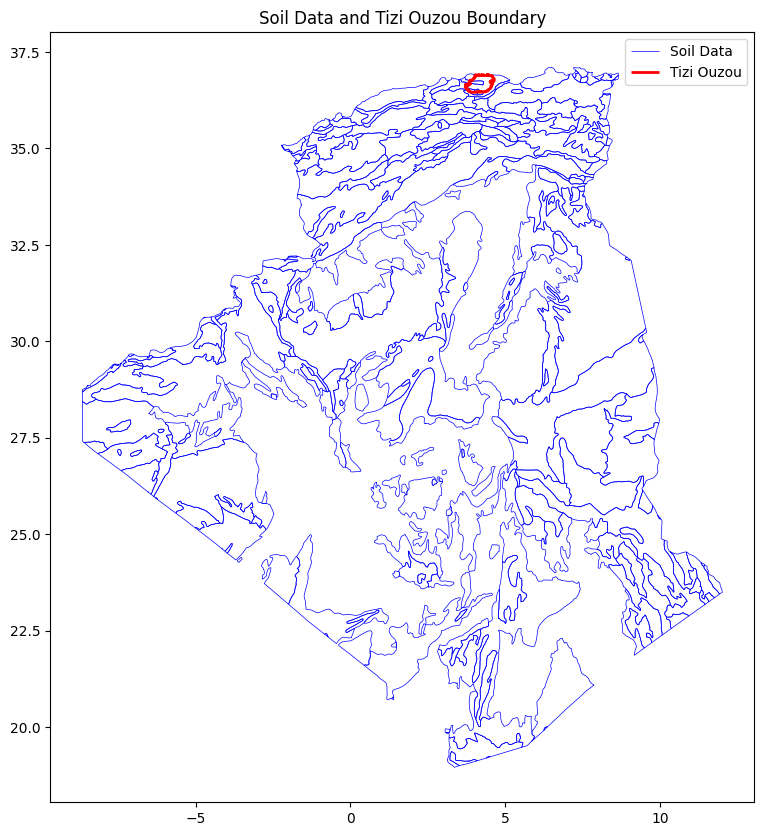

In [40]:
import matplotlib.pyplot as plt

# Plotting the original soil data and Tizi Ouzou area
fig, ax = plt.subplots(figsize=(10, 10))
soil_gdf.boundary.plot(ax=ax, color='blue', linewidth=0.5, label='Soil Data')
tizi_ouzou_gdf.boundary.plot(ax=ax, color='red', linewidth=2, label='Tizi Ouzou')
plt.legend()
plt.title("Soil Data and Tizi Ouzou Boundary")
plt.show()


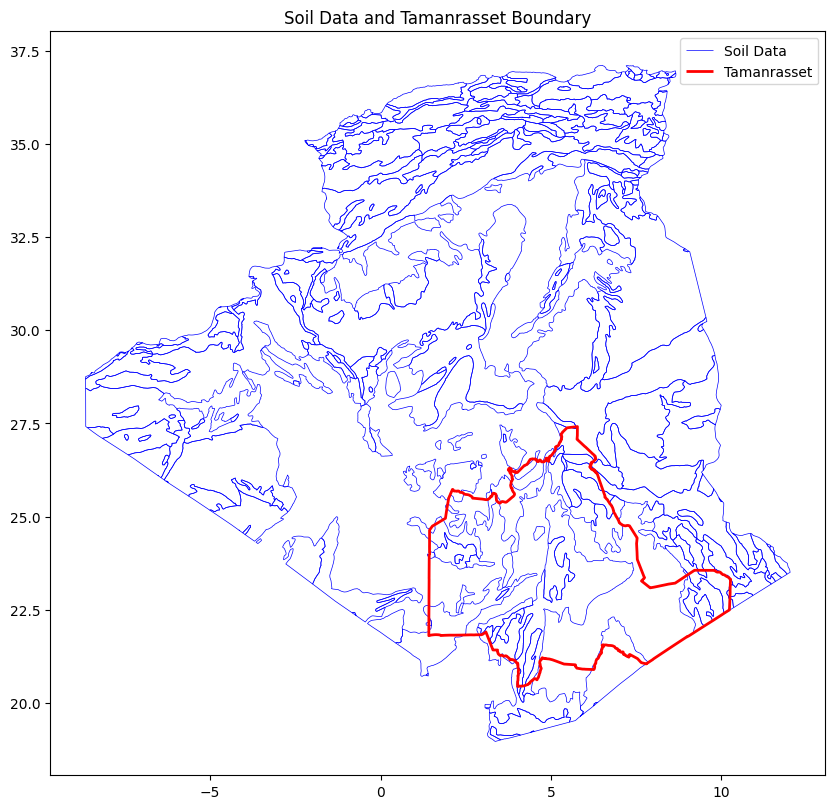

In [41]:
fig, ax = plt.subplots(figsize=(10, 10))
soil_gdf.boundary.plot(ax=ax, color='blue', linewidth=0.5, label='Soil Data')
tamanrasset_gdf.boundary.plot(ax=ax, color='red', linewidth=2, label='Tamanrasset')
plt.legend()
plt.title("Soil Data and Tamanrasset Boundary")
plt.show()


In [35]:

tizi_ouzou_soil_gdf = soil_gdf[soil_gdf.intersects(tizi_ouzou_gdf.geometry.values[0])]
print(tizi_ouzou_soil_gdf)

   CNT_FULLNAME  sand % topsoil  sand % subsoil  silt % topsoil  \
6       ALGERIA           55.90          54.180          20.240   
12      ALGERIA           40.08          38.085          20.015   
16      ALGERIA           55.44          54.550          20.840   
21      ALGERIA           59.20          61.050          15.650   

    silt% subsoil  clay % topsoil  clay % subsoil  pH water topsoil  \
6           19.38          23.880          26.440              6.94   
12          18.79          39.875          43.095              6.89   
16          19.55          23.750          25.900              6.94   
21          15.30          25.200          23.650              7.30   

    pH water subsoil  OC % topsoil  ...  CEC subsoil  CEC clay topsoil  \
6               7.28        0.6900  ...        12.14              47.6   
12              7.02        0.6135  ...        29.37              61.0   
16              7.36        0.6300  ...        13.13              45.7   
21          

In [34]:
tamanrasset_soil_gdf = soil_gdf[soil_gdf.intersects(tamanrasset_gdf.geometry.values[0])]
print(tamanrasset_soil_gdf)


    CNT_FULLNAME  sand % topsoil  sand % subsoil  silt % topsoil  \
155      ALGERIA          40.710           40.60          34.400   
192      ALGERIA          29.450           28.00           8.100   
211      ALGERIA           0.000            0.00           0.000   
212      ALGERIA           0.000            0.00           0.000   
213      ALGERIA          40.710           40.60          34.400   
214      ALGERIA          49.200           42.40          26.000   
218      ALGERIA           0.000            0.00           0.000   
220      ALGERIA          29.450           28.00           8.100   
221      ALGERIA          29.450           28.00           8.100   
226      ALGERIA          49.040           45.40          26.220   
233      ALGERIA           0.000            0.00           0.000   
234      ALGERIA           0.000            0.00           0.000   
236      ALGERIA          49.200           42.40          26.000   
239      ALGERIA           0.000            0.00

In [13]:
import os

# Check if the folder path is correct and list .nc files
nc_folder_path = "Datasets\\Climate-DATA\\"
print("Files in the directory:", os.listdir(nc_folder_path))


Files in the directory: ['PSurf_WFDE5_CRU_201901_v2.1.nc', 'PSurf_WFDE5_CRU_201902_v2.1.nc', 'PSurf_WFDE5_CRU_201903_v2.1.nc', 'PSurf_WFDE5_CRU_201904_v2.1.nc', 'PSurf_WFDE5_CRU_201905_v2.1.nc', 'PSurf_WFDE5_CRU_201906_v2.1.nc', 'PSurf_WFDE5_CRU_201907_v2.1.nc', 'PSurf_WFDE5_CRU_201908_v2.1.nc', 'PSurf_WFDE5_CRU_201909_v2.1.nc', 'PSurf_WFDE5_CRU_201910_v2.1.nc', 'PSurf_WFDE5_CRU_201911_v2.1.nc', 'PSurf_WFDE5_CRU_201912_v2.1.nc', 'Qair_WFDE5_CRU_201901_v2.1.nc', 'Qair_WFDE5_CRU_201902_v2.1.nc', 'Qair_WFDE5_CRU_201903_v2.1.nc', 'Qair_WFDE5_CRU_201904_v2.1.nc', 'Qair_WFDE5_CRU_201905_v2.1.nc', 'Qair_WFDE5_CRU_201906_v2.1.nc', 'Qair_WFDE5_CRU_201907_v2.1.nc', 'Qair_WFDE5_CRU_201908_v2.1.nc', 'Qair_WFDE5_CRU_201909_v2.1.nc', 'Qair_WFDE5_CRU_201910_v2.1.nc', 'Qair_WFDE5_CRU_201911_v2.1.nc', 'Qair_WFDE5_CRU_201912_v2.1.nc', 'Rainf_WFDE5_CRU_201901_v2.1.nc', 'Rainf_WFDE5_CRU_201902_v2.1.nc', 'Rainf_WFDE5_CRU_201903_v2.1.nc', 'Rainf_WFDE5_CRU_201904_v2.1.nc', 'Rainf_WFDE5_CRU_201905_v2.1.nc', '

In [15]:
import xarray as xr

# Path to a single .nc file
nc_file_path = "Datasets\\Climate-DATA\\PSurf_WFDE5_CRU_201901_v2.1.nc"

# Load the file
climate_data = xr.open_dataset(nc_file_path)

# Display information about the dataset
print(climate_data)


<xarray.Dataset> Size: 771MB
Dimensions:  (time: 744, lon: 720, lat: 360)
Coordinates:
  * time     (time) datetime64[ns] 6kB 2019-01-01 ... 2019-01-31T23:00:00
  * lon      (lon) float64 6kB -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 3kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
Data variables:
    PSurf    (time, lat, lon) float32 771MB ...
Attributes:
    title:        WATCH Forcing Data methodology applied to ERA5 data
    institution:  Copernicus Climate Change Service
    contact:      http://copernicus-support.ecmwf.int
    comment:      Methodology implementation for ERA5 and dataset production ...
    Conventions:  CF-1.7
    summary:      ERA5 data regridded to half degree regular lat-lon; Genuine...
    reference:    Cucchi et al., 2020, Earth Syst. Sci. Data, 12(3), 2097–212...
    licence:      The dataset is distributed under the Licence to Use Coperni...


In [54]:
import xarray as xr
import geopandas as gpd
import os
import random

# Set the path for climate data files
nc_folder_path = "Datasets\\Climate-DATA\\"
nc_files = [os.path.join(nc_folder_path, f) for f in os.listdir(nc_folder_path) if f.endswith(".nc")]

climate_data_list = []

# Function to get unique vertices from the polygon
def get_polygon_vertices(polygon):
    return list(polygon.exterior.coords)

# Load each climate dataset and filter by latitude/longitude based on polygon vertices
for file in nc_files:
    try:
        # Load the climate dataset
        ds = xr.open_dataset(file)
        
        # For each polygon in the GeoDataFrame, get the unique vertices
        for polygon in tizi_ouzou_soil_gdf.geometry:
            vertices = get_polygon_vertices(polygon)
            sampled_points = random.sample(vertices, min(10, len(vertices)))  # Sample up to 10 vertices per polygon
            
            # Extract data for each sampled point
            for point in sampled_points:
                lon, lat = point
                subset = ds.sel(lat=lat, lon=lon, method="nearest")
                climate_data_list.append(subset)
    except Exception as e:
        print(f"Error processing {file}: {e}")

# Concatenate the results along the time dimension
final_climate_data = xr.concat(climate_data_list, dim="time")


In [58]:
#print(final_climate_data)
print(final_climate_data.sizes['time'])
print(final_climate_data.count())
print(final_climate_data.isel(time=slice(0, 10)))

2102400
<xarray.Dataset> Size: 24B
Dimensions:  ()
Data variables:
    PSurf    int32 4B 350400
    Qair     int32 4B 350400
    Rainf    int32 4B 350400
    Snowf    int32 4B 350400
    Tair     int32 4B 350400
    Wind     int32 4B 350400
<xarray.Dataset> Size: 480B
Dimensions:  (time: 10)
Coordinates:
  * time     (time) datetime64[ns] 80B 2019-01-01 ... 2019-01-01T09:00:00
    lon      (time) float64 80B 4.25 4.25 4.25 4.25 4.25 ... 4.25 4.25 4.25 4.25
    lat      (time) float64 80B 36.25 36.25 36.25 36.25 ... 36.25 36.25 36.25
Data variables:
    PSurf    (time) float32 40B 9.325e+04 9.325e+04 ... 9.336e+04 9.338e+04
    Qair     (time) float32 40B nan nan nan nan nan nan nan nan nan nan
    Rainf    (time) float32 40B nan nan nan nan nan nan nan nan nan nan
    Snowf    (time) float32 40B nan nan nan nan nan nan nan nan nan nan
    Tair     (time) float32 40B nan nan nan nan nan nan nan nan nan nan
    Wind     (time) float32 40B nan nan nan nan nan nan nan nan nan nan
Attribute

In [59]:
from shapely.geometry import Point

# Convert final_climate_data to GeoDataFrame
df = final_climate_data.to_dataframe().reset_index()
df['geometry'] = [Point(xy) for xy in zip(df['lon'], df['lat'])]
gdf_climate = gpd.GeoDataFrame(df, geometry='geometry')


gdf_climate = gdf_climate.set_crs(tizi_ouzou_soil_gdf.crs, allow_override=True)

print(df.head())
print(gdf_climate.head())

                 time         PSurf  Qair  Rainf  Snowf  Tair  Wind   lon  \
0 2019-01-01 00:00:00  93247.023438   NaN    NaN    NaN   NaN   NaN  4.25   
1 2019-01-01 01:00:00  93245.929688   NaN    NaN    NaN   NaN   NaN  4.25   
2 2019-01-01 02:00:00  93256.125000   NaN    NaN    NaN   NaN   NaN  4.25   
3 2019-01-01 03:00:00  93240.250000   NaN    NaN    NaN   NaN   NaN  4.25   
4 2019-01-01 04:00:00  93219.023438   NaN    NaN    NaN   NaN   NaN  4.25   

     lat            geometry  
0  36.25  POINT (4.25 36.25)  
1  36.25  POINT (4.25 36.25)  
2  36.25  POINT (4.25 36.25)  
3  36.25  POINT (4.25 36.25)  
4  36.25  POINT (4.25 36.25)  
                 time         PSurf  Qair  Rainf  Snowf  Tair  Wind   lon  \
0 2019-01-01 00:00:00  93247.023438   NaN    NaN    NaN   NaN   NaN  4.25   
1 2019-01-01 01:00:00  93245.929688   NaN    NaN    NaN   NaN   NaN  4.25   
2 2019-01-01 02:00:00  93256.125000   NaN    NaN    NaN   NaN   NaN  4.25   
3 2019-01-01 03:00:00  93240.250000   NaN  

In [60]:
df.to_csv("final_climate_data.csv", index=False)

gdf_climate.to_file("final_climate_data.gpkg", driver="GPKG")

gdf_climate.to_file("final_climate_data.shp")

tizi_ouzou_soil_gdf.to_file("tizi_ouzou_soil_data.gpkg", driver="GPKG")

tizi_ouzou_soil_gdf.to_file("tizi_ouzou_soil_data.shp")




c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\pyogrio\geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\pyogrio\geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Field time create as date field, though DateTime requested.
  ogr_write(
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\pyogrio\geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\

B

In [4]:
import numpy as np 

In [5]:
def median(column_values):
    
    sorted_values = sorted(column_values) 

  
    n = len(sorted_values)
   
    if n % 2 == 1:
        median = sorted_values[n // 2]

    else:
        mid1 = sorted_values[n // 2 - 1]
        mid2 = sorted_values[n // 2]
        median = (mid1 + mid2) / 2
    
    return median

In [6]:
def mode(df, attribute):
    # Drop NaN values
    values = df[attribute].dropna()
    
    # Dictionary to store the frequency of each value
    frequency_dict = {}
    
    # Iterate over the values and count frequencies
    for value in values:
        if value in frequency_dict:
            frequency_dict[value] += 1
        else:
            frequency_dict[value] = 1
    
    # Find the maximum frequency
    max_count = max(frequency_dict.values())
    
    # Collect all values that have the maximum frequency
    most_frequent_values = [value for value, count in frequency_dict.items() if count == max_count]
    
    return most_frequent_values

In [16]:
def calculate_tendencies(df, attribute):

    attribute_values = pd.to_numeric(df[attribute], errors='coerce').dropna()

    if np.issubdtype(attribute_values.dtype, np.number):

        return [attribute_values.mean(),median(attribute_values),mode(df,attribute)]
    else:

        return mode(df,attribute)

In [8]:
def outliers(df, attribute):
    
    # Drop NaN values
    values =  pd.to_numeric(df[attribute], errors='coerce').dropna()

    sorted_values = sorted(values) 

    Q1 = np.percentile(sorted_values, 25)

    Q3 = np.percentile(sorted_values, 75)

    IQR = Q3 - Q1


    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[attribute] < lower_bound) | (df[attribute] > upper_bound)]

    return [Q1, Q3, IQR, outliers]

In [9]:
def missing_unique_values(df, attribute):
    total_missing = df[attribute].isna().sum()
    unique_values = df[attribute].nunique()
    return total_missing, unique_values

In [10]:

def histogram(attribute_name, attribute_values, bins=50):
    
    cleaned_values = attribute_values[~pd.isna(attribute_values)]
    
    if len(cleaned_values) == 0:
        print("No valid data to plot after removing NaN values.")
        return

   
    counts, bin_edges = np.histogram(cleaned_values, bins=bins)

       
    plt.figure()
    plt.title(f"{attribute_name} Histogram")
    plt.xlabel("Values")
    plt.ylabel("Nb Occurrences")
    plt.plot(bin_edges[:-1], counts, marker='o') 
    plt.show()

In [11]:

def generate_box_plot(data, attribute_name, show_outliers=True):
    # Remove NaN values from the data
    cleaned_data = data.dropna()

    # Convert the data to a list or numpy array for compatibility
    cleaned_data = np.array(cleaned_data)
    
    # Create the figure and axis for the plot
    fig, ax = plt.subplots()
    
    # Generate the box plot
    if show_outliers:
        ax.boxplot(cleaned_data, vert=False, patch_artist=True, labels=[attribute_name])
    else:
        ax.boxplot(cleaned_data, vert=False, patch_artist=True, labels=[attribute_name], showfliers=False)
    
    # Set the title and display grid
    plt.title(f'Box Plot for {attribute_name}')
    plt.grid(True)
    
    # Show the plot
    plt.show()

In [12]:
def bar_chart(df,attribute_name, bins=10):
    
    attribute_values = df[attribute_name]
    plt.hist(attribute_values.dropna(), bins=bins, edgecolor='k', alpha=0.75)
    plt.xlabel('Values')
    plt.ylabel('Frequencies')
    plt.title(f'Histogram for {attribute_name}')
    plt.tight_layout()
    plt.show()
        


In [68]:

soil_numerical_cols = tizi_ouzou_soil_gdf.select_dtypes(include=[np.number]).columns
soil_non_numerical_cols = tizi_ouzou_soil_gdf.select_dtypes(exclude=[np.number]).columns
print(soil_numerical_cols)
print(soil_non_numerical_cols)

Index(['sand % topsoil', 'sand % subsoil', 'silt % topsoil', 'silt% subsoil',
       'clay % topsoil', 'clay % subsoil', 'pH water topsoil',
       'pH water subsoil', 'OC % topsoil', 'OC % subsoil', 'N % topsoil',
       'N % subsoil', 'BS % topsoil', 'BS % subsoil', 'CEC topsoil',
       'CEC subsoil', 'CEC clay topsoil', 'CEC Clay subsoil',
       'CaCO3 % topsoil', 'CaCO3 % subsoil', 'BD topsoil', 'BD subsoil',
       'C/N topsoil', 'C/N subsoil'],
      dtype='object')
Index(['CNT_FULLNAME', 'geometry'], dtype='object')


In [152]:
import pandas as pd

# Initialize a list to store results
results = []

# List of attributes
attributes = [
    'sand % topsoil', 'sand % subsoil', 'silt % topsoil', 'silt% subsoil',
    'clay % topsoil', 'clay % subsoil', 'pH water topsoil',
    'pH water subsoil', 'OC % topsoil', 'OC % subsoil', 'N % topsoil',
    'N % subsoil', 'BS % topsoil', 'BS % subsoil', 'CEC topsoil',
    'CEC subsoil', 'CEC clay topsoil', 'CEC Clay subsoil',
    'CaCO3 % topsoil', 'CaCO3 % subsoil', 'BD topsoil', 'BD subsoil',
    'C/N topsoil', 'C/N subsoil'
]

# Iterate over each attribute
for attribute in attributes:
    # Calculate tendencies (mean, median, mode)
    tendencies = calculate_tendencies(tizi_ouzou_soil_gdf, attribute)
    mean_val = tendencies[0]
    median_val = tendencies[1]
    mode_val = tendencies[2]
    
    # Calculate outliers (Q1, Q3, IQR, presence of outliers)
    outliers_data = outliers(tizi_ouzou_soil_gdf, attribute)
    Q1, Q3, IQR, outliers_df = outliers_data
    has_outliers = not outliers_df.empty
    
    # Calculate missing and unique values
    missing_vals, unique_vals = missing_unique_values(tizi_ouzou_soil_gdf, attribute)
    
    # Append results for this attribute to the list
    results.append({
        "Attribute": attribute,
        "Mean": mean_val,
        "Median": median_val,
        "Mode": ', '.join(map(str, mode_val)) if isinstance(mode_val, list) else mode_val,
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "Has Outliers": "Yes" if has_outliers else "No",
        "Missing Values": missing_vals,
        "Unique Values": unique_vals
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
results_df.to_csv("soil_attributes_summary.csv", index=False, sep=';')

print("Results saved to soil_attributes_summary.csv")


Results saved to soil_attributes_summary.csv


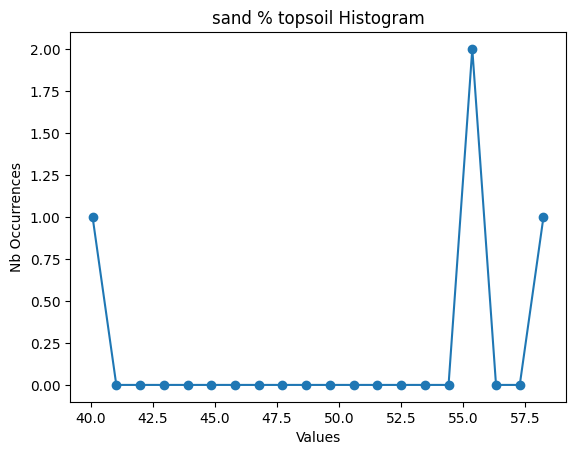

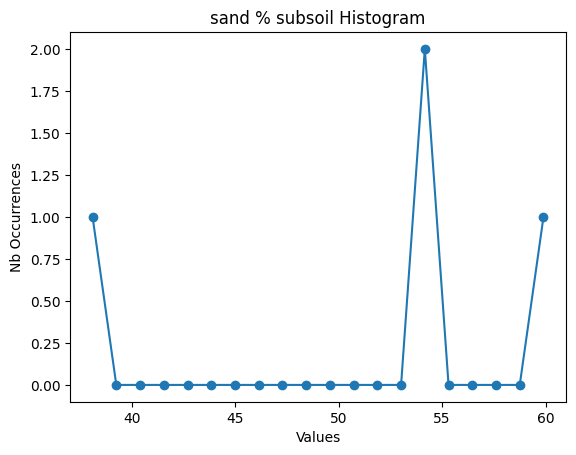

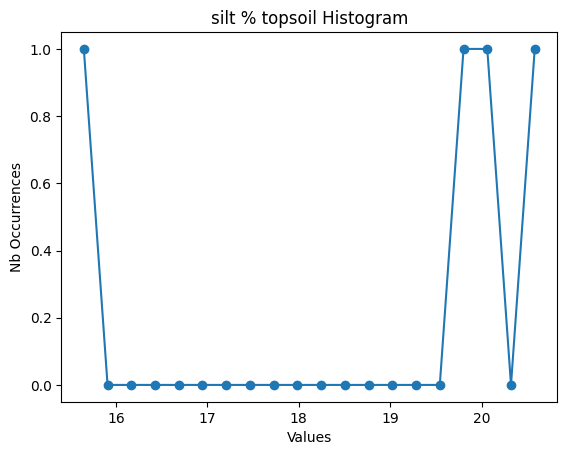

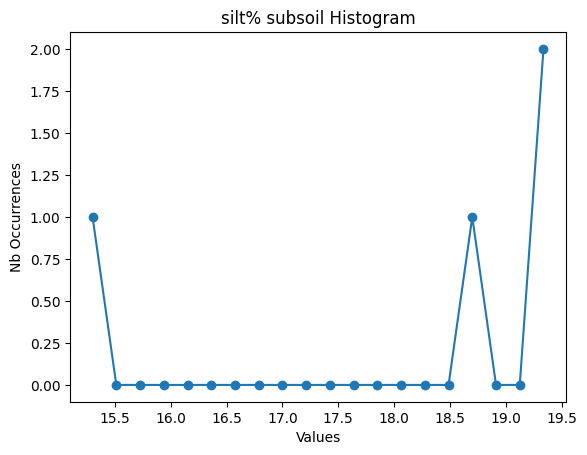

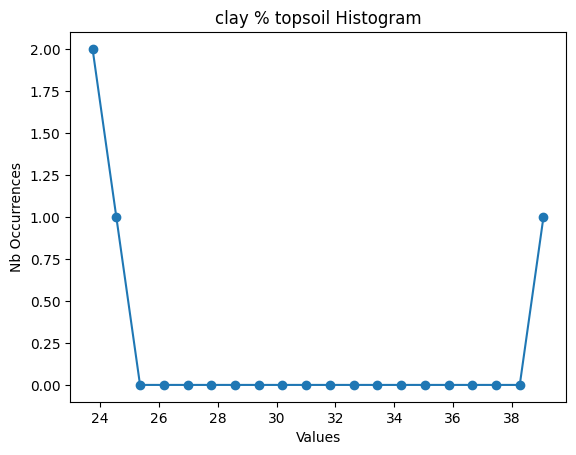

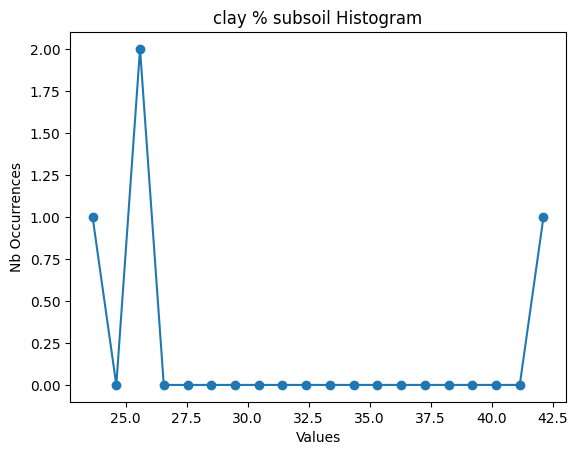

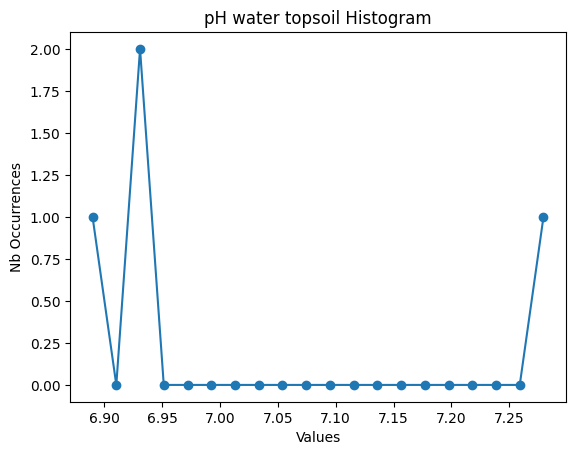

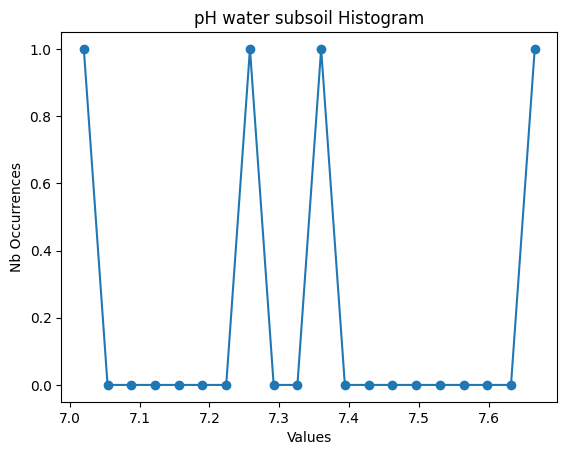

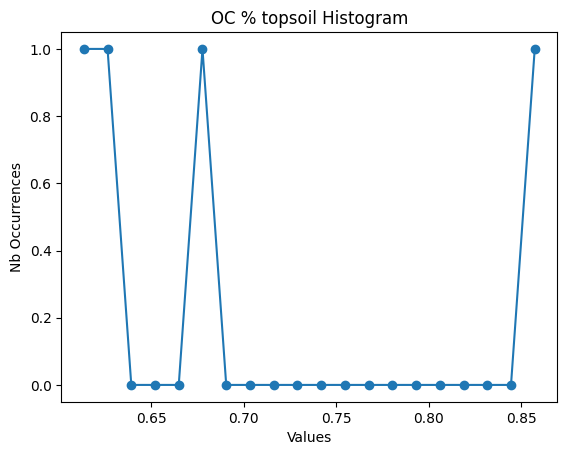

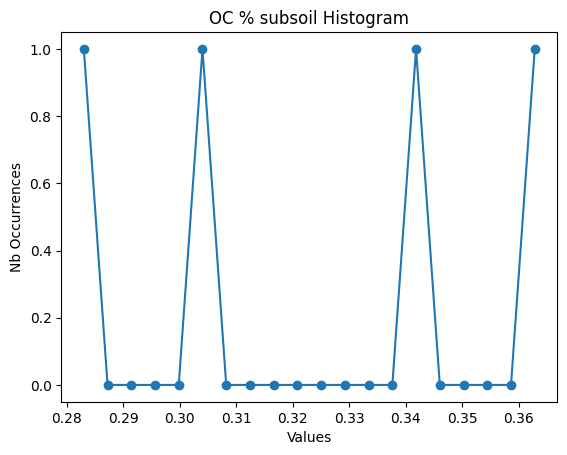

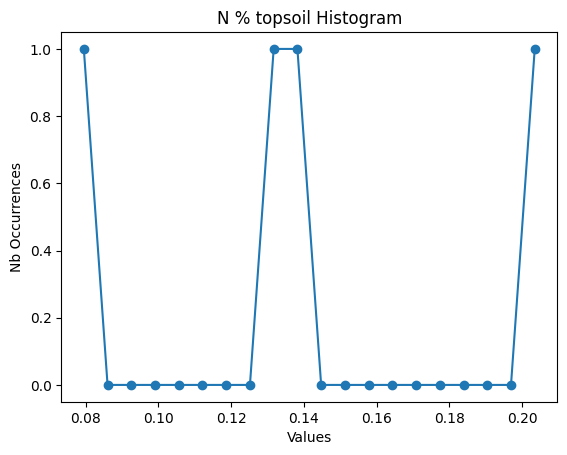

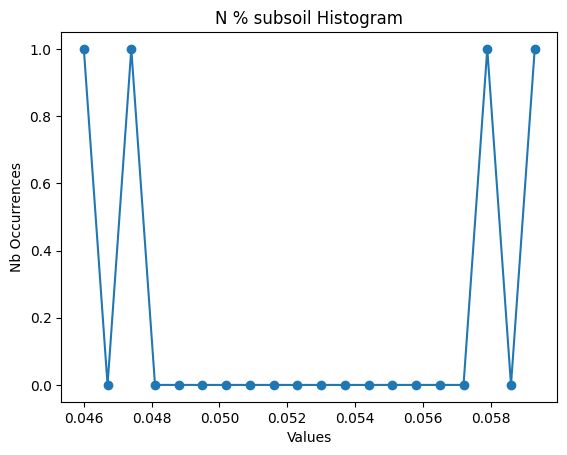

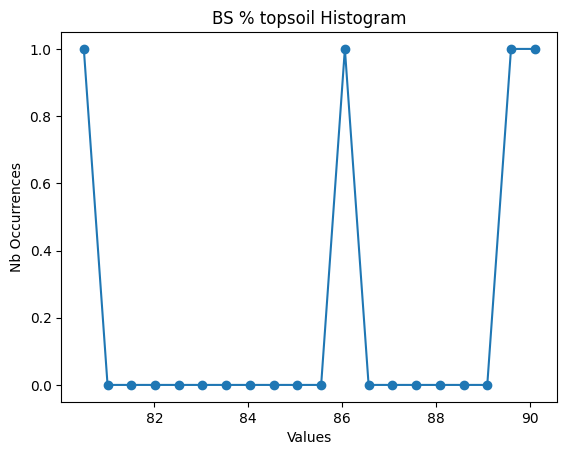

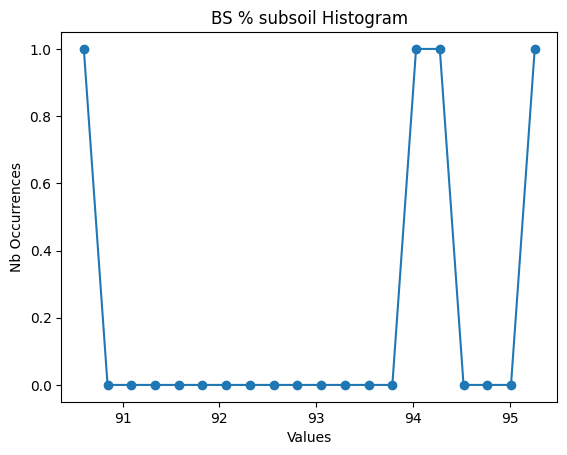

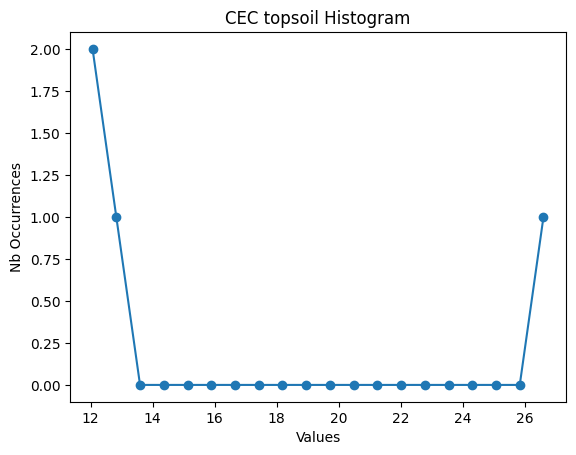

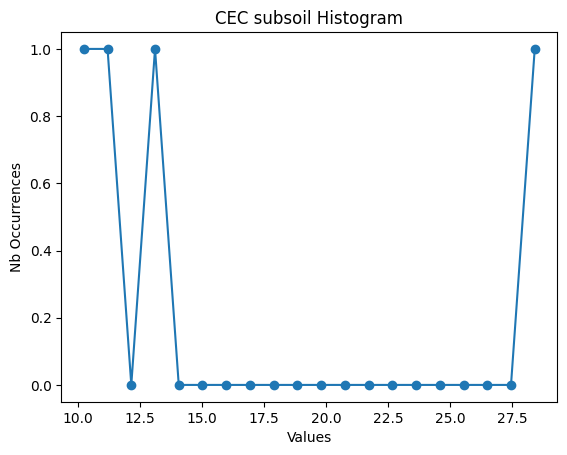

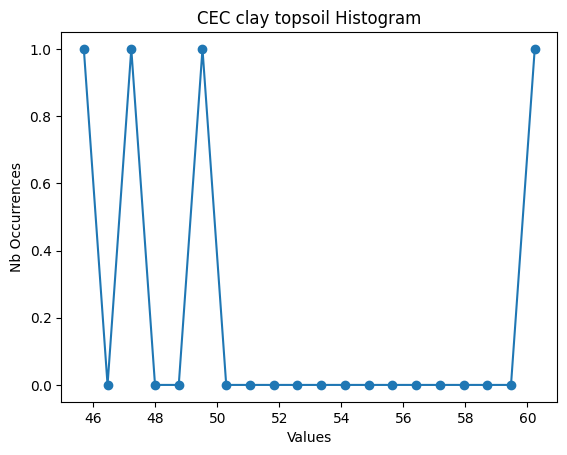

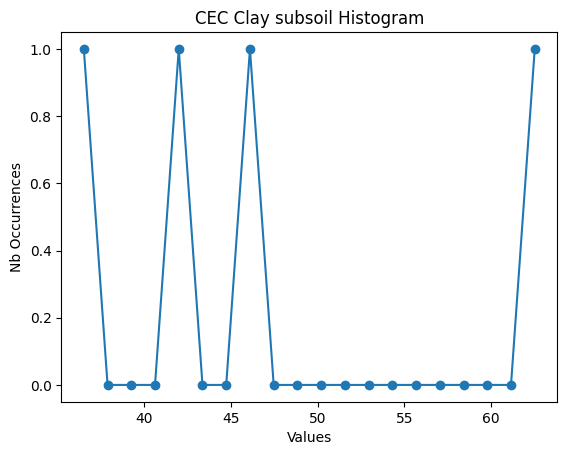

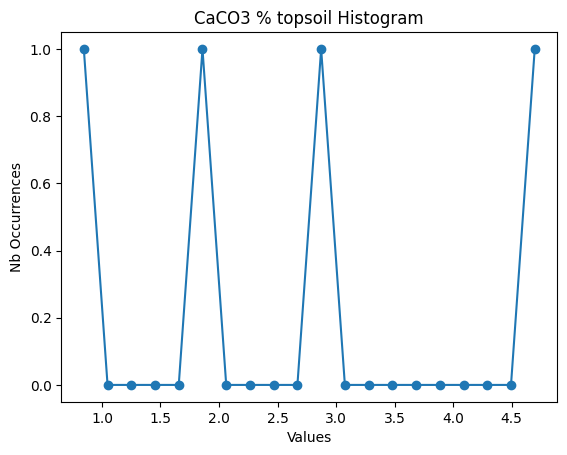

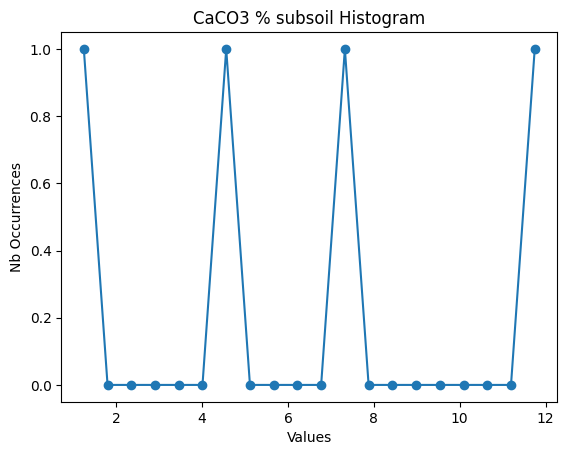

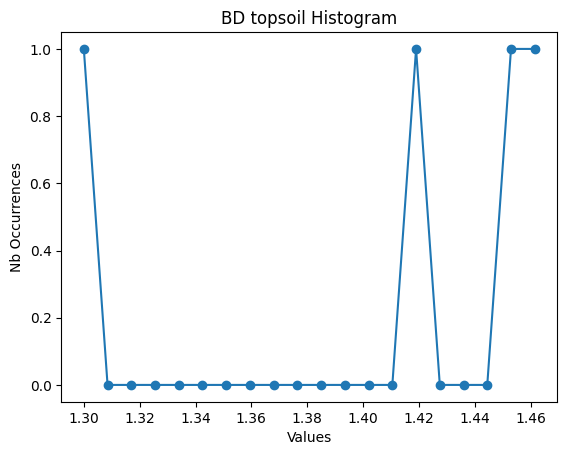

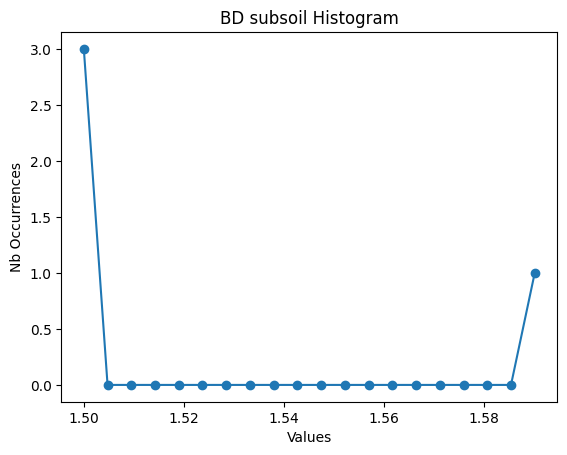

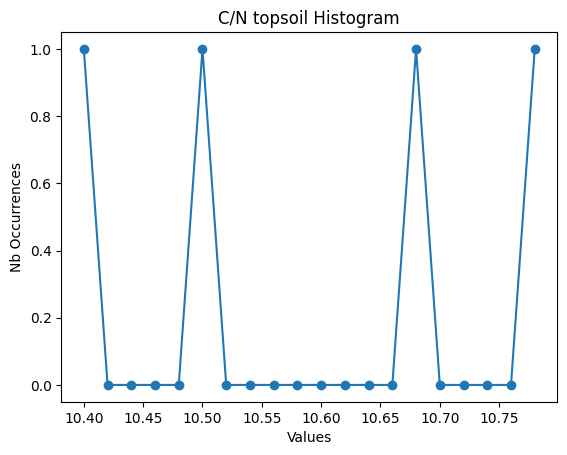

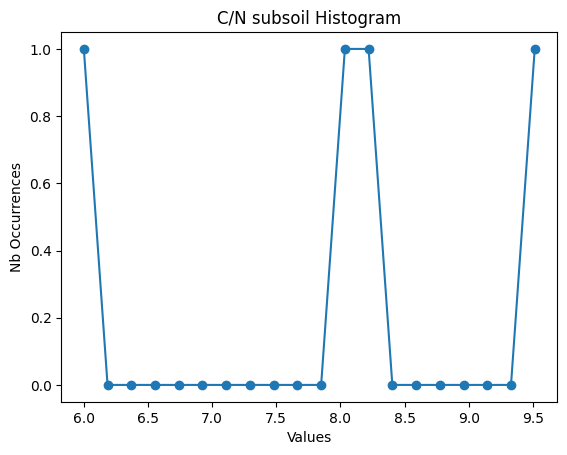

In [155]:
      


attributes = [
    'sand % topsoil', 'sand % subsoil', 'silt % topsoil', 'silt% subsoil',
    'clay % topsoil', 'clay % subsoil', 'pH water topsoil',
    'pH water subsoil', 'OC % topsoil', 'OC % subsoil', 'N % topsoil',
    'N % subsoil', 'BS % topsoil', 'BS % subsoil', 'CEC topsoil',
    'CEC subsoil', 'CEC clay topsoil', 'CEC Clay subsoil',
    'CaCO3 % topsoil', 'CaCO3 % subsoil', 'BD topsoil', 'BD subsoil',
    'C/N topsoil', 'C/N subsoil'
]

for attribute in attributes:
    histogram(attribute, tizi_ouzou_soil_gdf[attribute].values, bins=20)



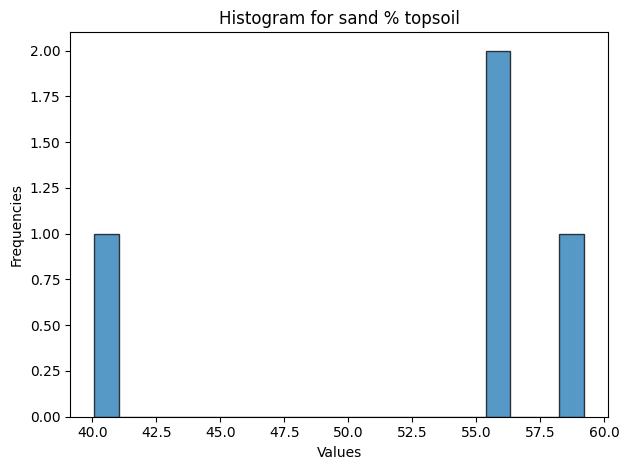

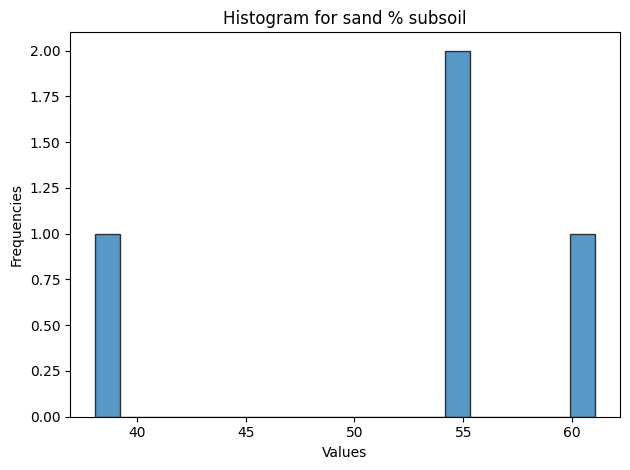

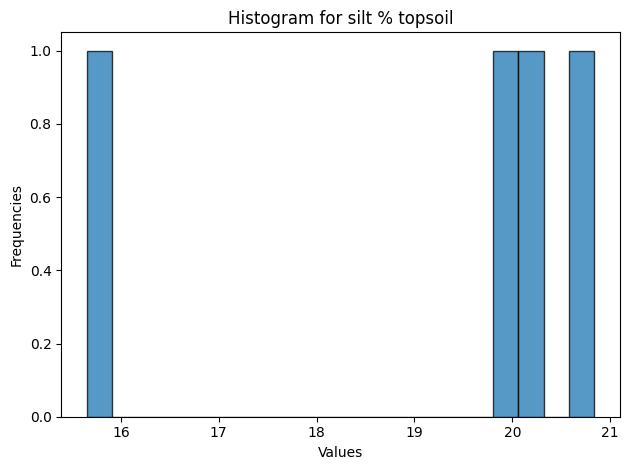

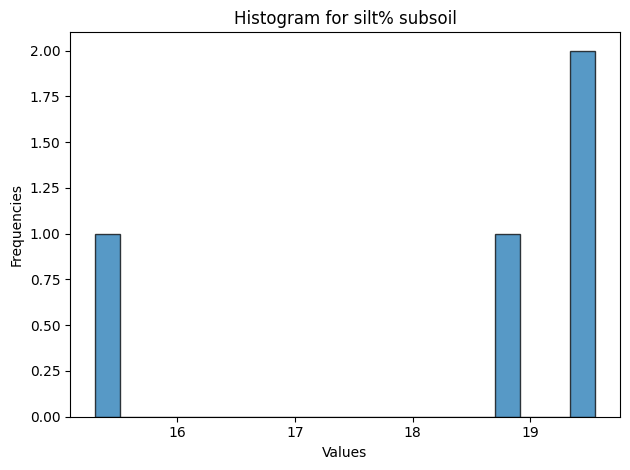

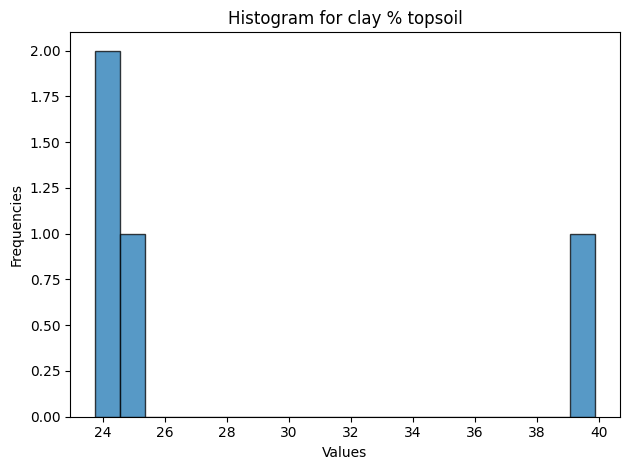

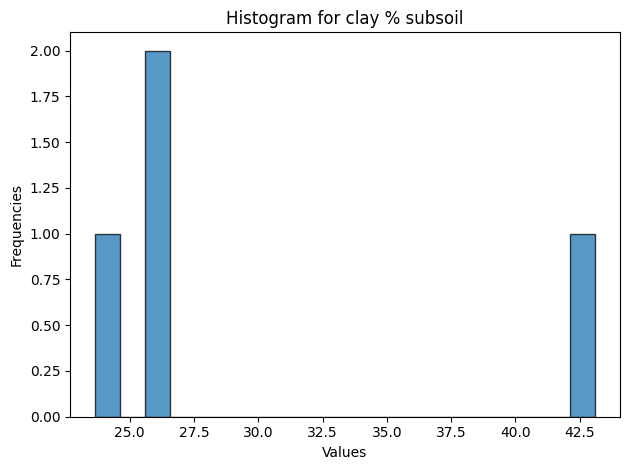

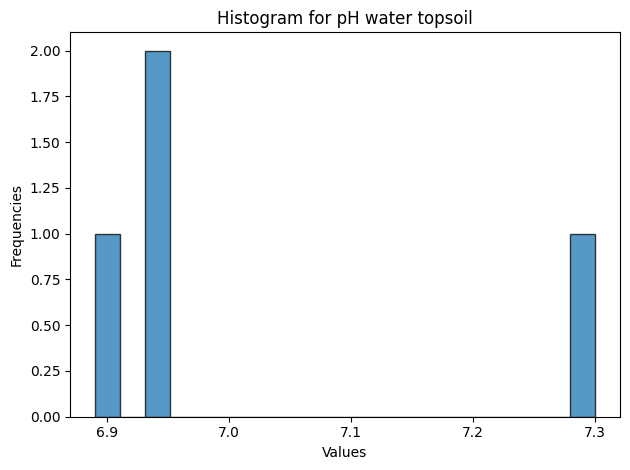

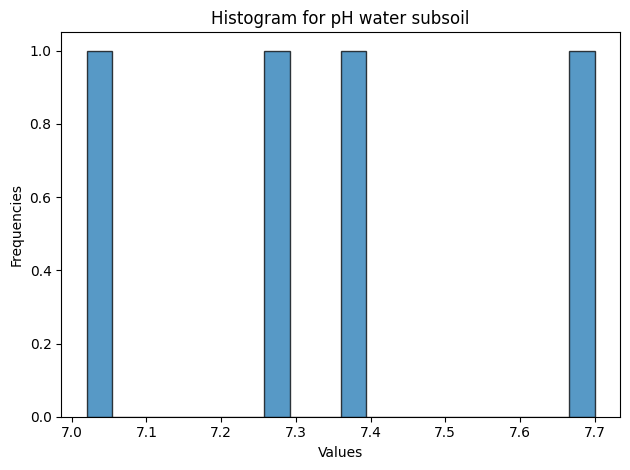

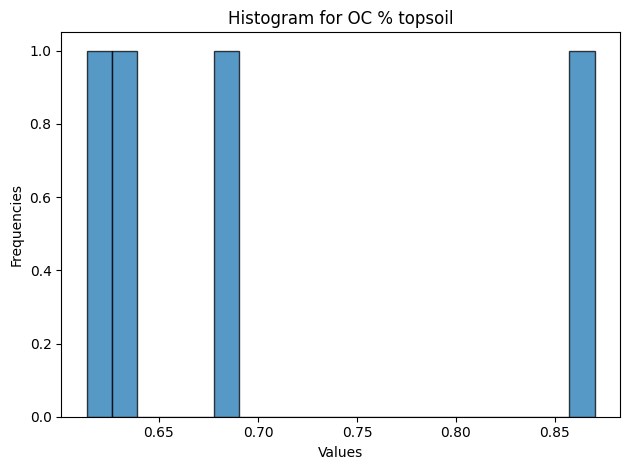

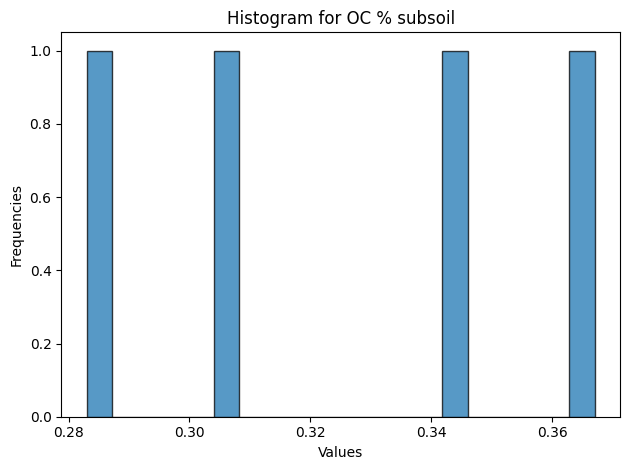

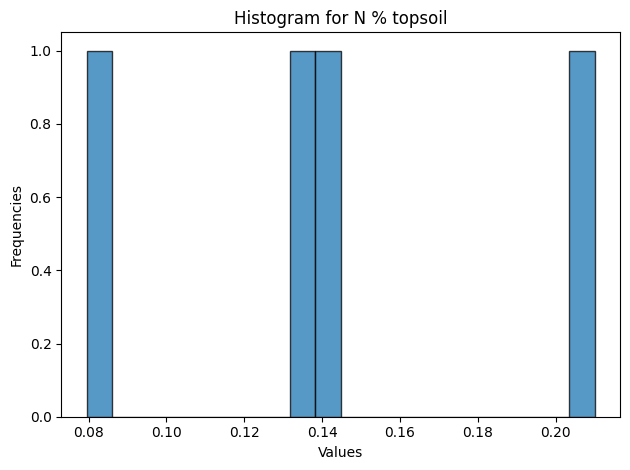

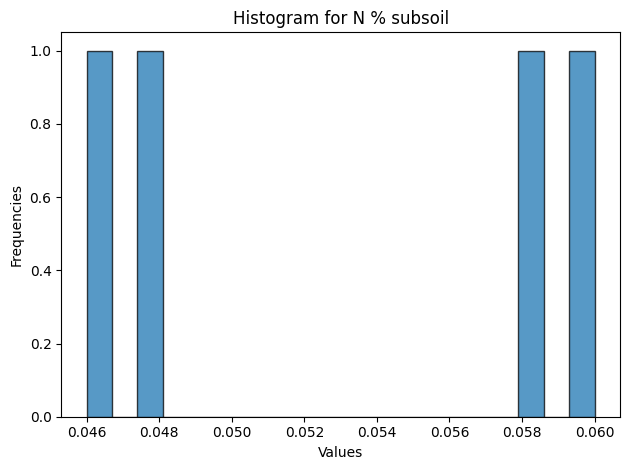

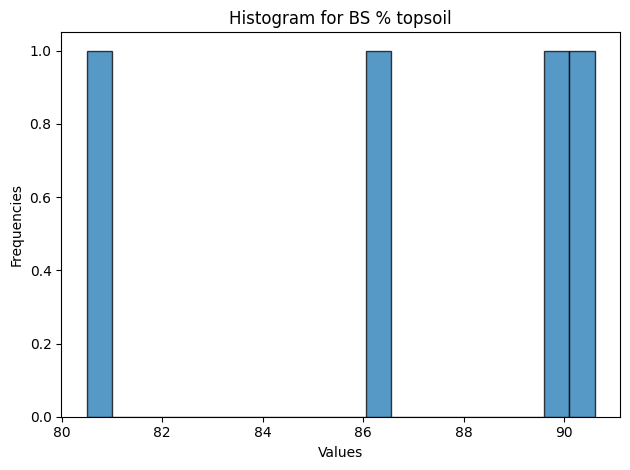

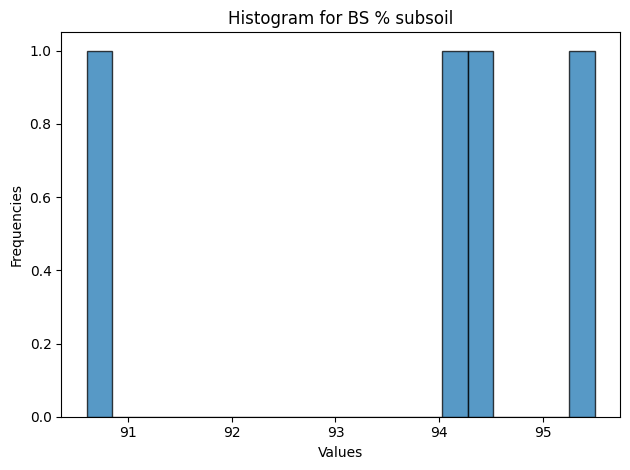

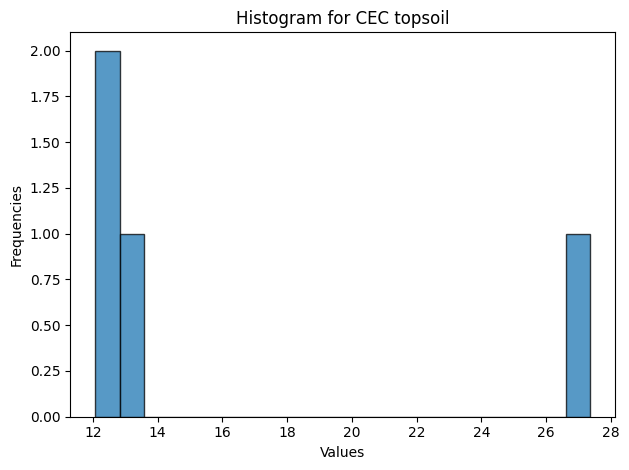

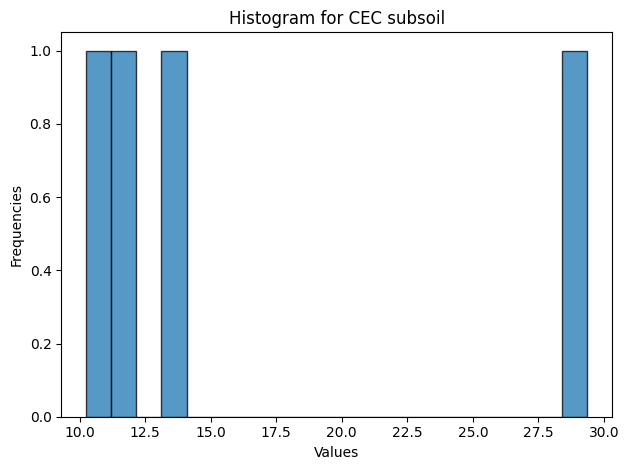

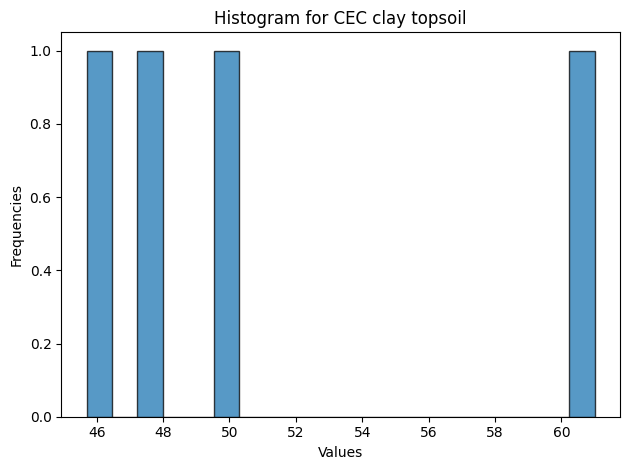

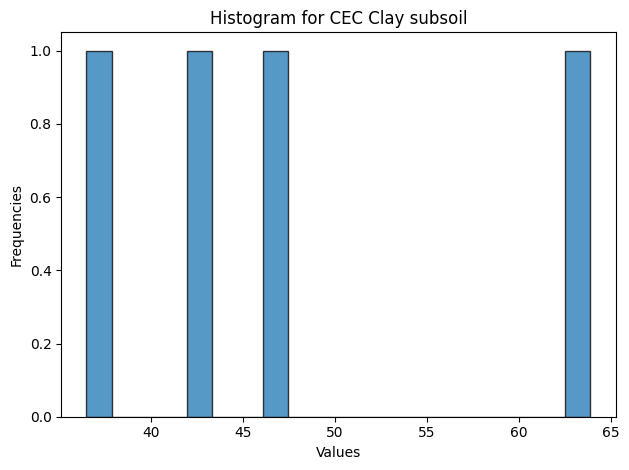

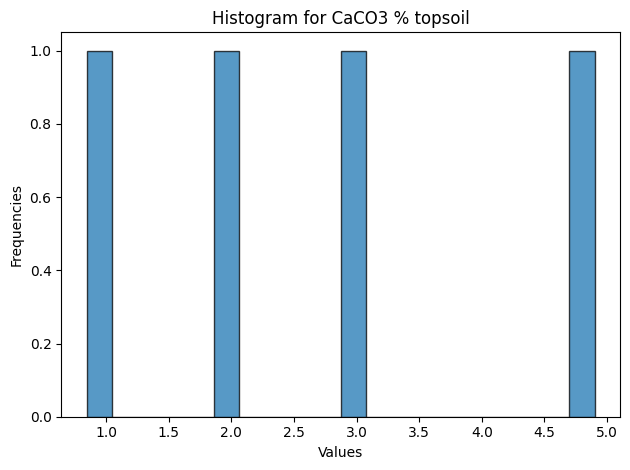

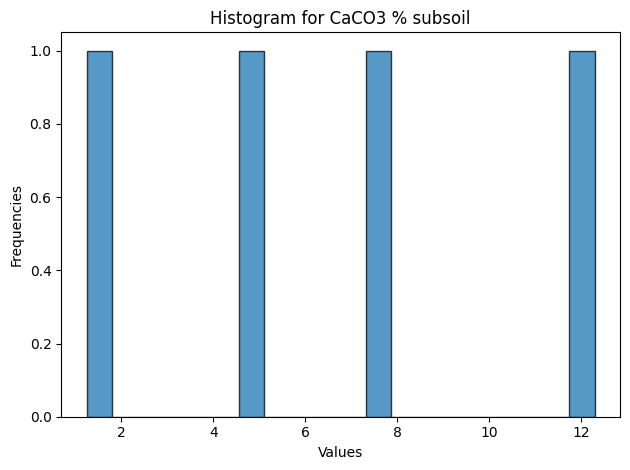

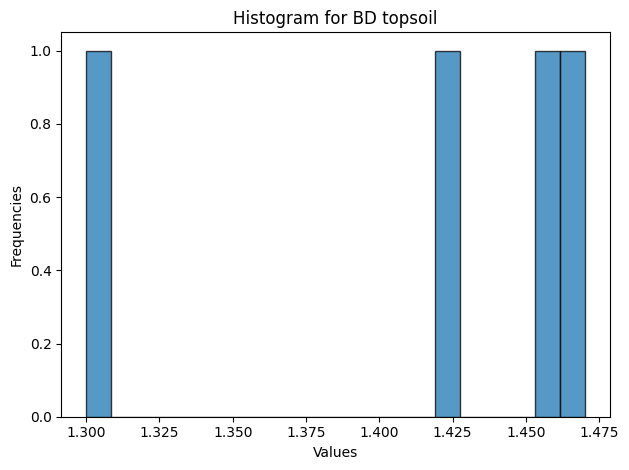

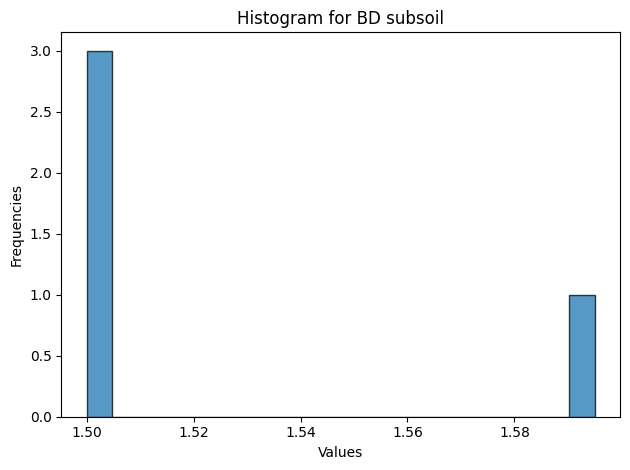

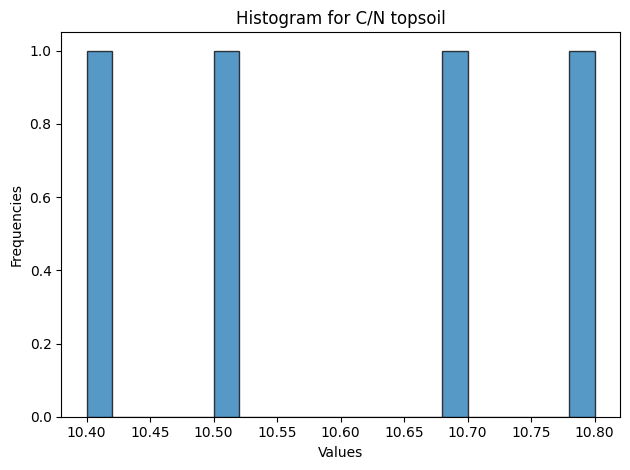

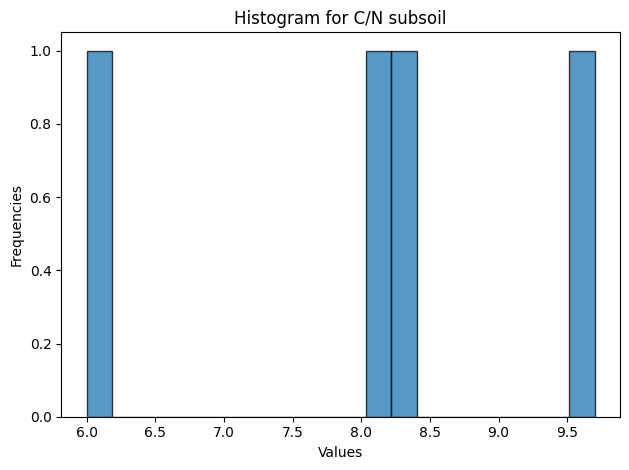

In [159]:

attributes = [
    'sand % topsoil', 'sand % subsoil', 'silt % topsoil', 'silt% subsoil',
    'clay % topsoil', 'clay % subsoil', 'pH water topsoil',
    'pH water subsoil', 'OC % topsoil', 'OC % subsoil', 'N % topsoil',
    'N % subsoil', 'BS % topsoil', 'BS % subsoil', 'CEC topsoil',
    'CEC subsoil', 'CEC clay topsoil', 'CEC Clay subsoil',
    'CaCO3 % topsoil', 'CaCO3 % subsoil', 'BD topsoil', 'BD subsoil',
    'C/N topsoil', 'C/N subsoil'
]

for attribute in attributes:
    bar_chart(tizi_ouzou_soil_gdf,attribute, bins=20)

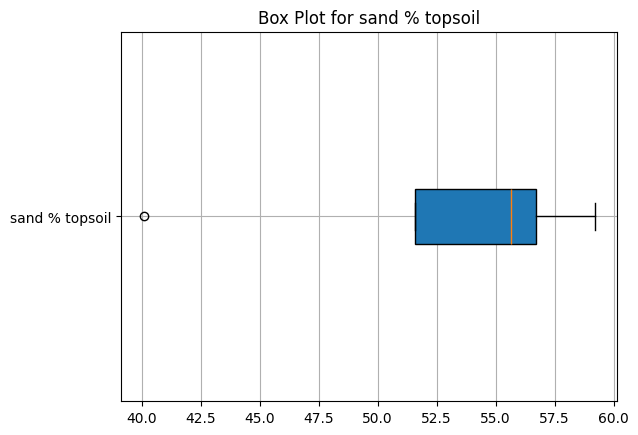

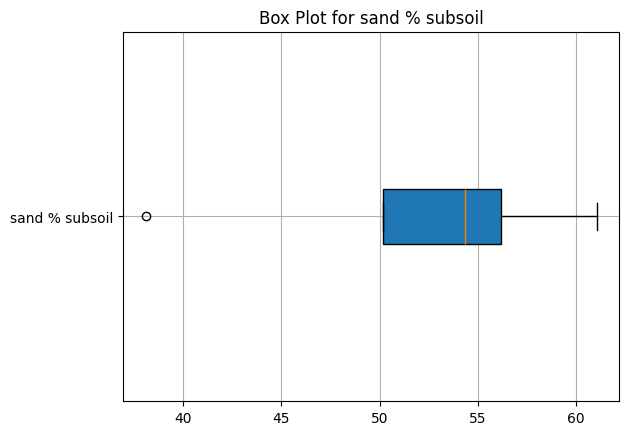

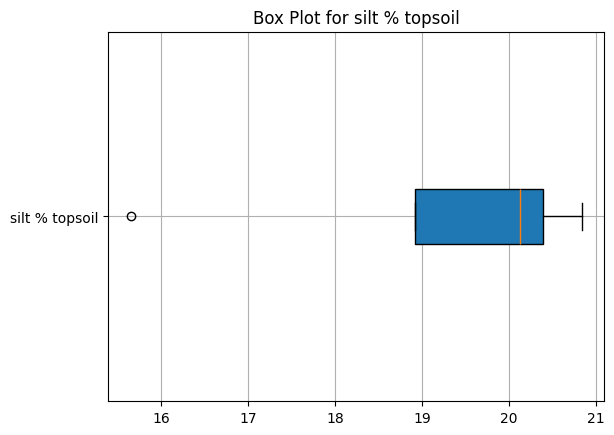

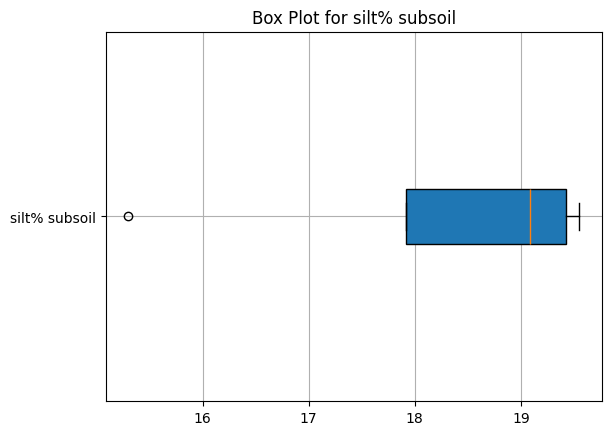

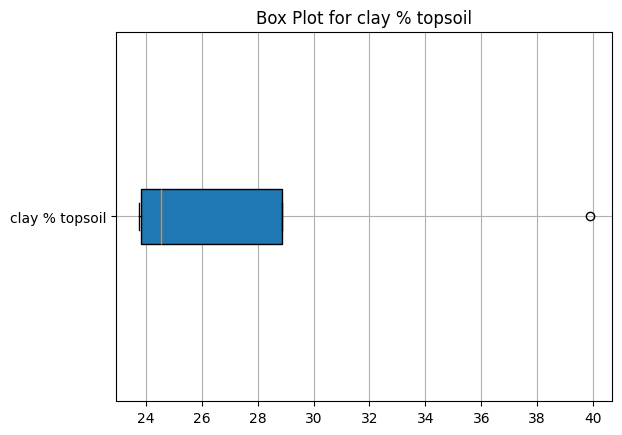

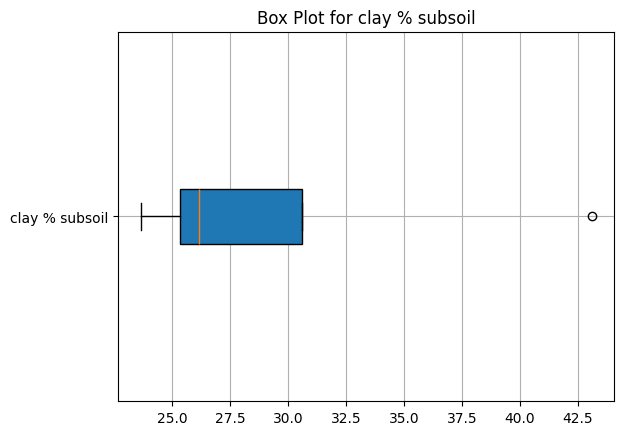

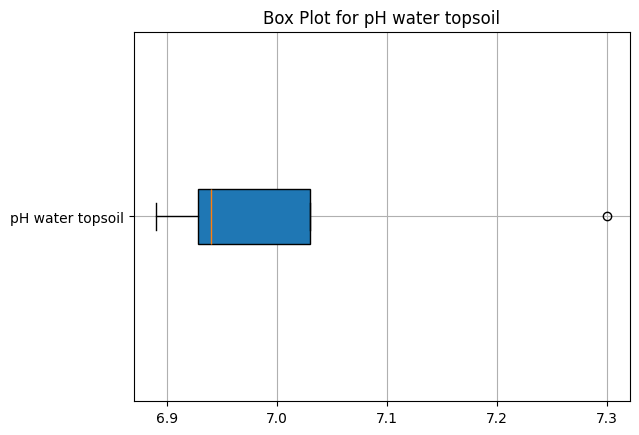

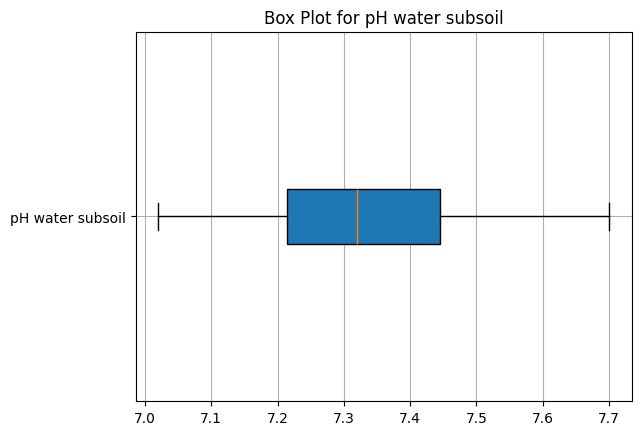

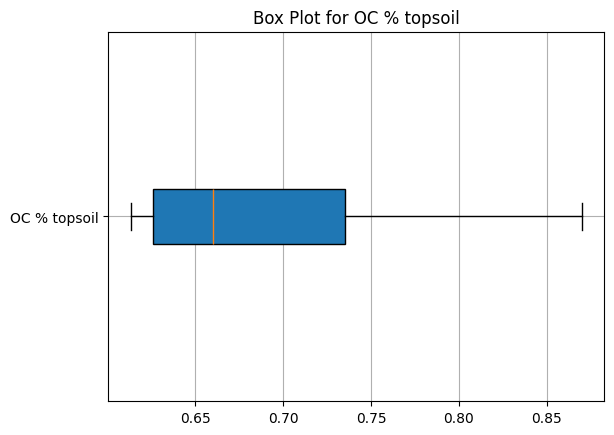

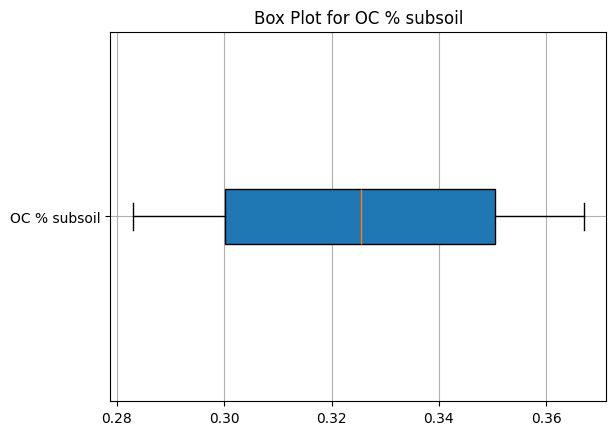

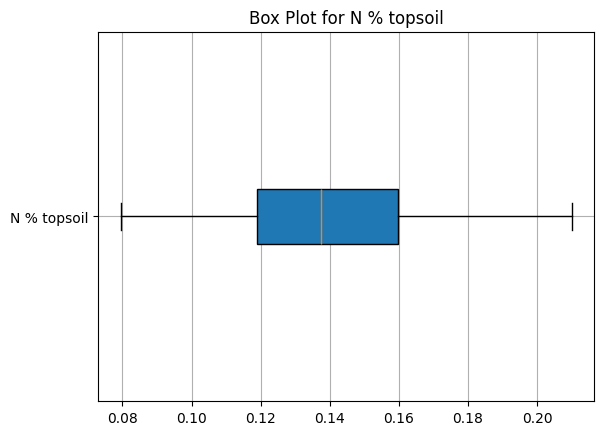

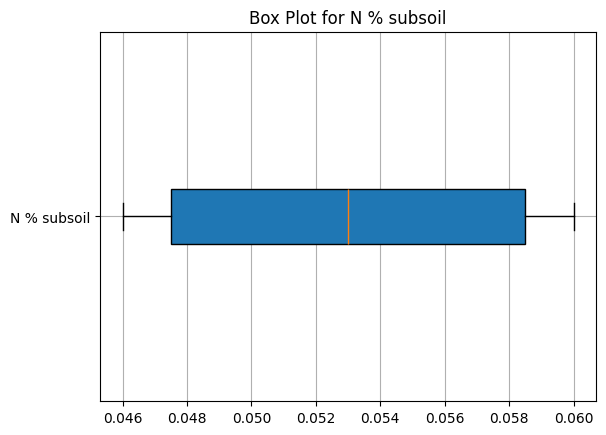

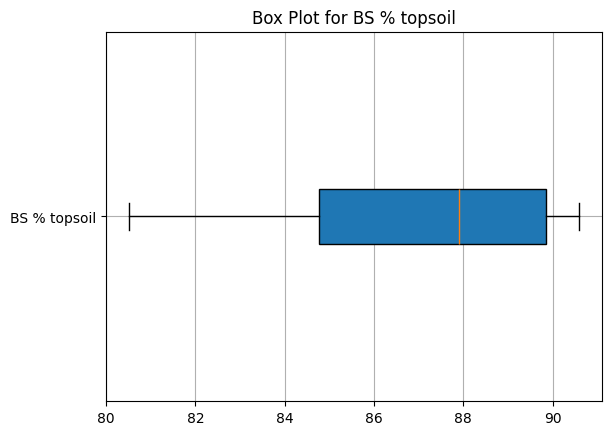

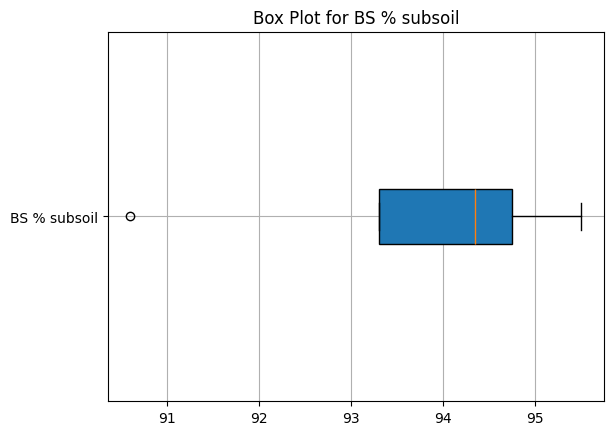

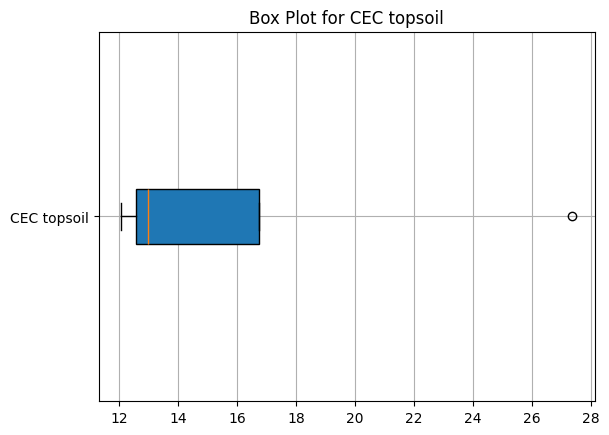

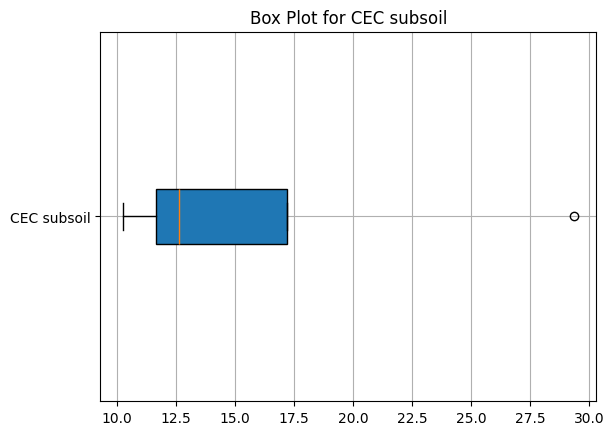

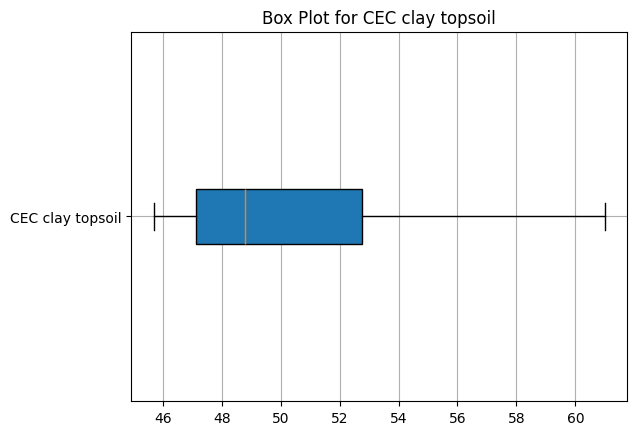

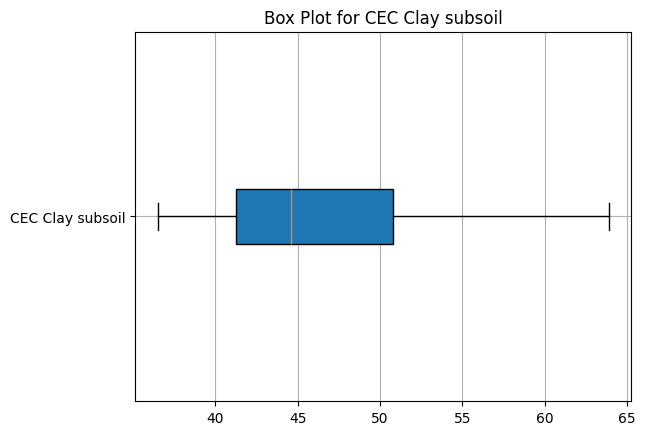

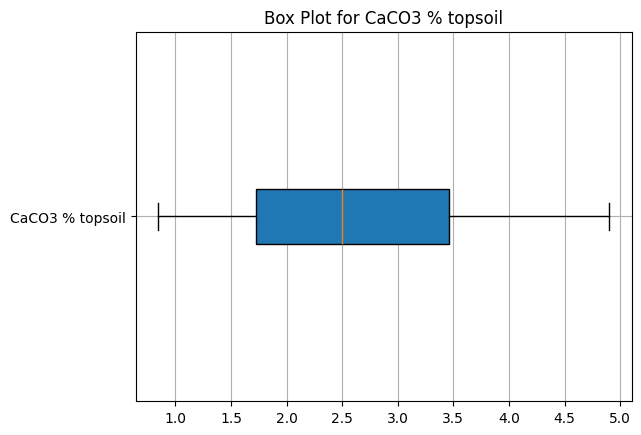

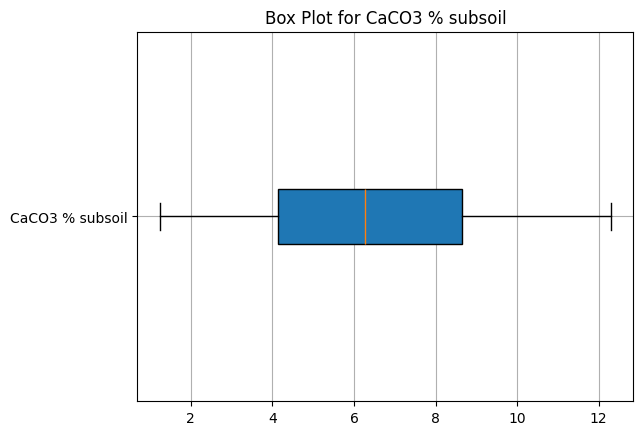

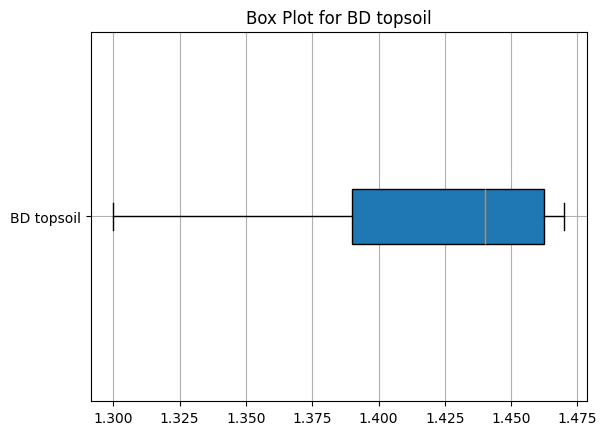

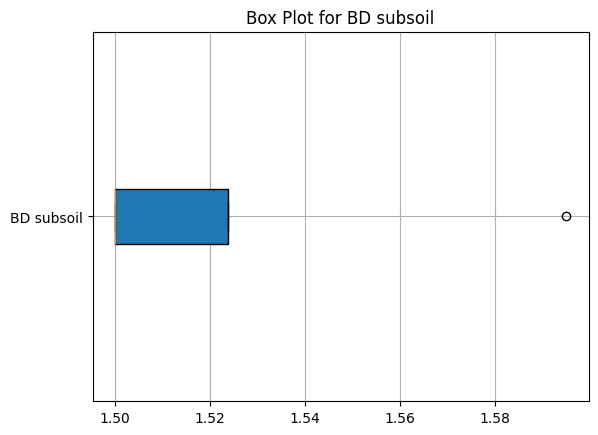

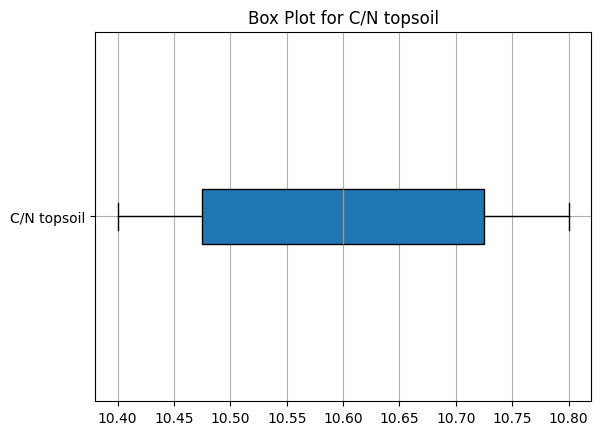

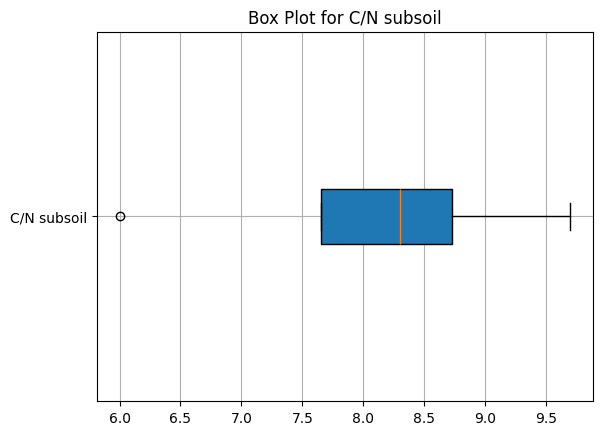

In [160]:
    

attributes = [
    'sand % topsoil', 'sand % subsoil', 'silt % topsoil', 'silt% subsoil',
    'clay % topsoil', 'clay % subsoil', 'pH water topsoil',
    'pH water subsoil', 'OC % topsoil', 'OC % subsoil', 'N % topsoil',
    'N % subsoil', 'BS % topsoil', 'BS % subsoil', 'CEC topsoil',
    'CEC subsoil', 'CEC clay topsoil', 'CEC Clay subsoil',
    'CaCO3 % topsoil', 'CaCO3 % subsoil', 'BD topsoil', 'BD subsoil',
    'C/N topsoil', 'C/N subsoil'
]

for attribute in attributes:
    generate_box_plot(tizi_ouzou_soil_gdf[attribute], attribute, show_outliers=True)

Climate attributes

In [2]:
df = pd.read_csv('final_climate_data.csv', delimiter=',' , engine='python')
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2102400 entries, 0 to 2102399
Data columns (total 10 columns):
 #   Column    Dtype  
---  ------    -----  
 0   time      object 
 1   PSurf     float64
 2   Qair      float64
 3   Rainf     float64
 4   Snowf     float64
 5   Tair      float64
 6   Wind      float64
 7   lon       float64
 8   lat       float64
 9   geometry  object 
dtypes: float64(8), object(2)
memory usage: 160.4+ MB
None
                  time      PSurf  Qair  Rainf  Snowf  Tair  Wind   lon  \
0  2019-01-01 00:00:00  93247.020   NaN    NaN    NaN   NaN   NaN  4.25   
1  2019-01-01 01:00:00  93245.930   NaN    NaN    NaN   NaN   NaN  4.25   
2  2019-01-01 02:00:00  93256.125   NaN    NaN    NaN   NaN   NaN  4.25   
3  2019-01-01 03:00:00  93240.250   NaN    NaN    NaN   NaN   NaN  4.25   
4  2019-01-01 04:00:00  93219.020   NaN    NaN    NaN   NaN   NaN  4.25   

     lat            geometry  
0  36.25  POINT (4.25 36.25)  
1  36.25  POINT (4.25 36.25)  
2  36.25

In [13]:
climate_numerical_cols = df.select_dtypes(include=[np.number]).columns
climate_non_numerical_cols = df.select_dtypes(exclude=[np.number]).columns
print(climate_numerical_cols)
print(climate_non_numerical_cols)

Index(['PSurf', 'Qair', 'Rainf', 'Snowf', 'Tair', 'Wind', 'lon', 'lat'], dtype='object')
Index(['time', 'geometry'], dtype='object')


In [17]:

results = []

# List of attributes
attributes = ['PSurf', 'Qair', 'Rainf', 'Snowf', 'Tair', 'Wind', 'lon', 'lat']

# Iterate over each attribute
for attribute in attributes:
    # Calculate tendencies (mean, median, mode)
    tendencies = calculate_tendencies(df, attribute)
    mean_val = tendencies[0]
    median_val = tendencies[1]
    print("median_val:"+str(median_val)+"\n")
    mode_val = tendencies[2]
    
    # Calculate outliers (Q1, Q3, IQR, presence of outliers)
    outliers_data = outliers(df, attribute)
    Q1, Q3, IQR, outliers_df = outliers_data
    has_outliers = not outliers_df.empty
    
    # Calculate missing and unique values
    missing_vals, unique_vals = missing_unique_values(df, attribute)
    
    # Append results for this attribute to the list
    results.append({
        "Attribute": attribute,
        "Mean": mean_val,
        "Median": median_val,
        "Mode": ', '.join(map(str, mode_val)) if isinstance(mode_val, list) else mode_val,
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "Has Outliers": "Yes" if has_outliers else "No",
        "Missing Values": missing_vals,
        "Unique Values": unique_vals
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
results_df.to_csv("climate_attributes_summary.csv", index=False, sep=';')

print("Results saved to climate_attributes_summary.csv")


median_val:96621.66

median_val:0.007776352

median_val:0.0

median_val:0.0

median_val:289.28174

median_val:2.1953647

median_val:4.25

median_val:36.75

Results saved to climate_attributes_summary.csv


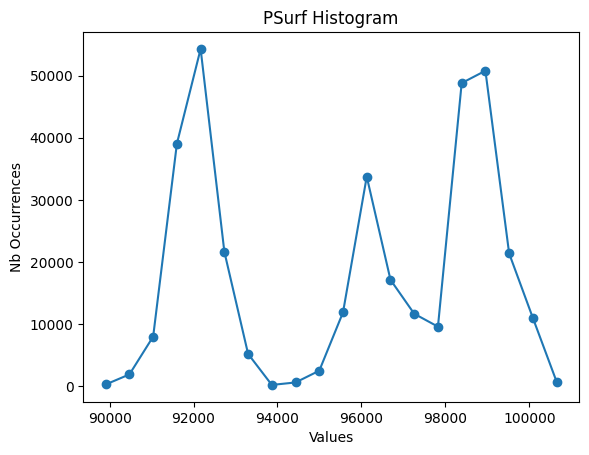

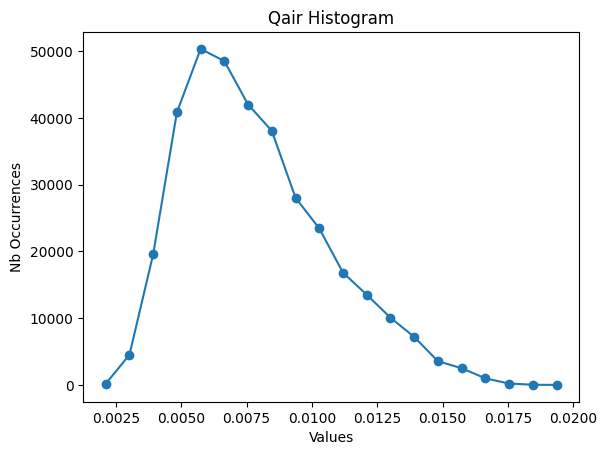

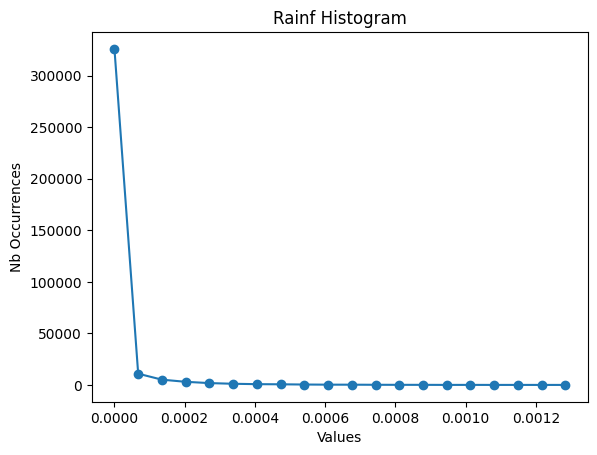

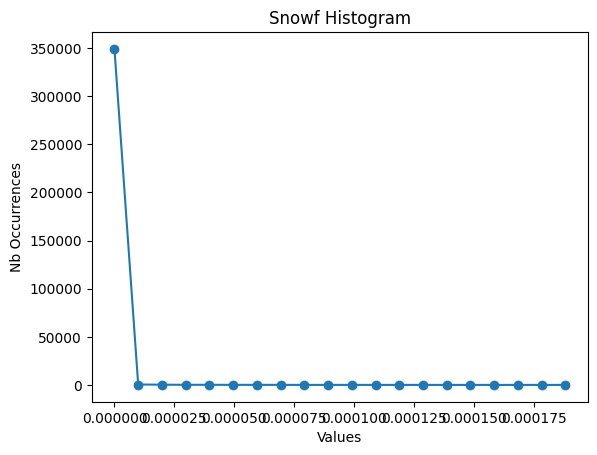

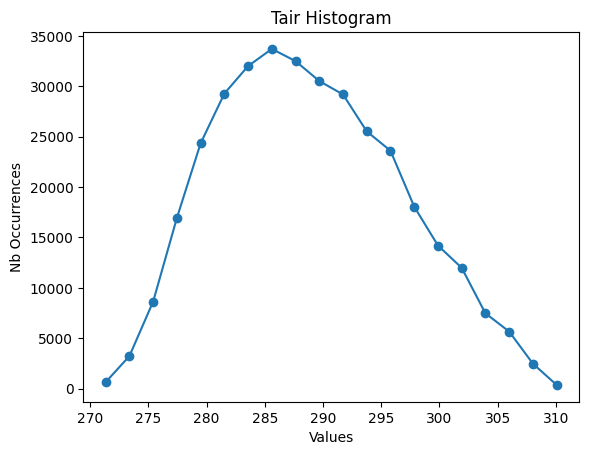

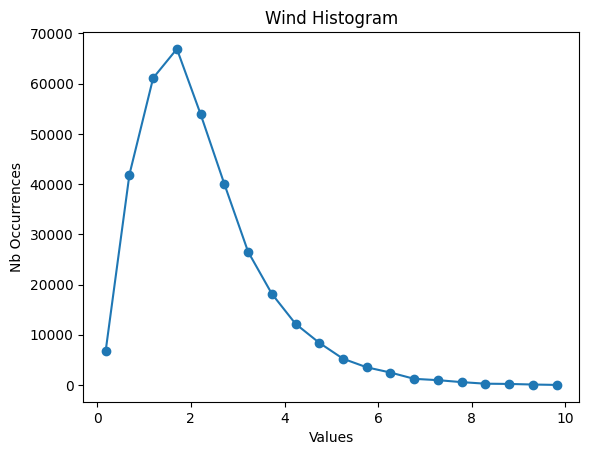

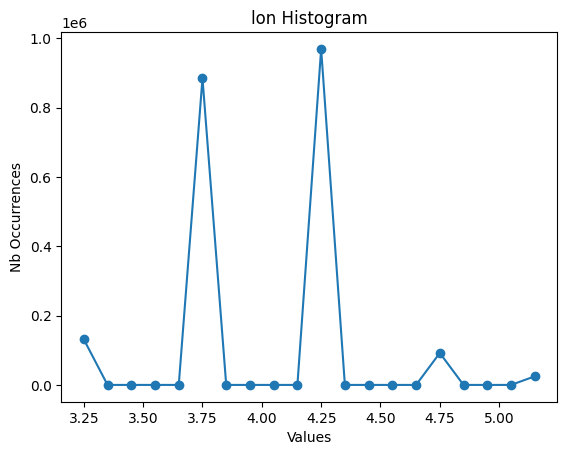

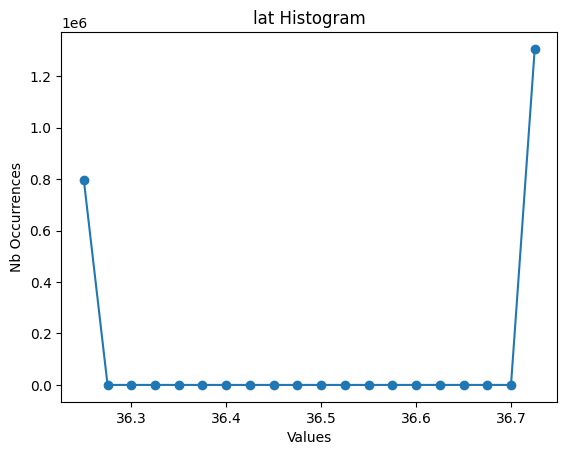

In [20]:


attributes = ['PSurf', 'Qair', 'Rainf', 'Snowf', 'Tair', 'Wind', 'lon', 'lat']

for attribute in attributes:
    histogram(attribute, df[attribute].values, bins=20)

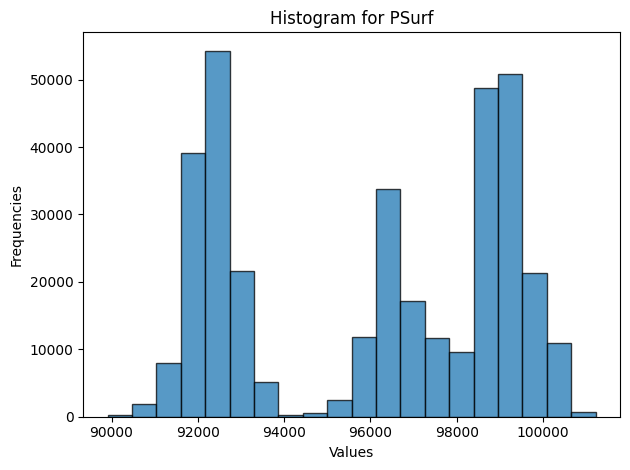

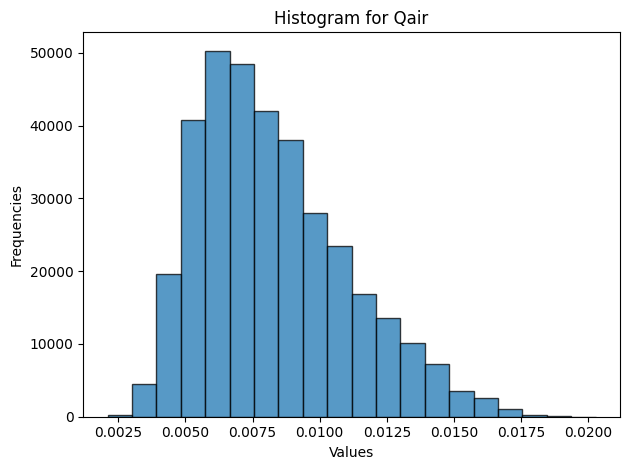

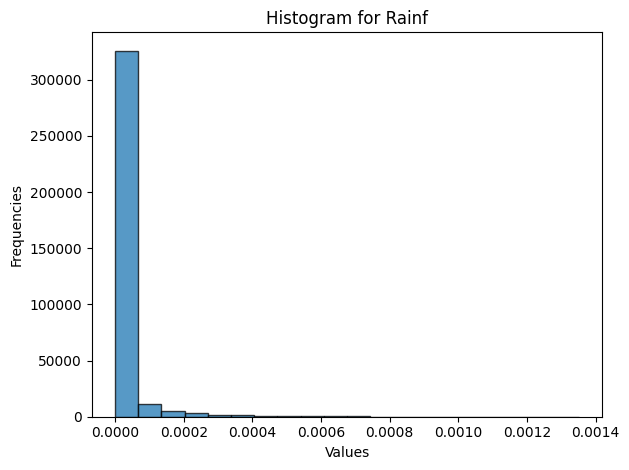

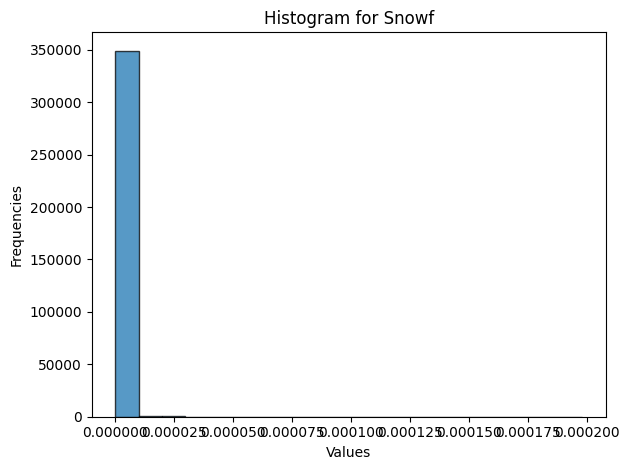

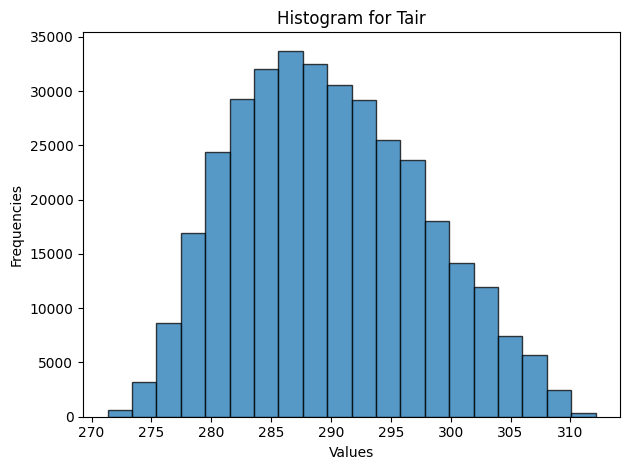

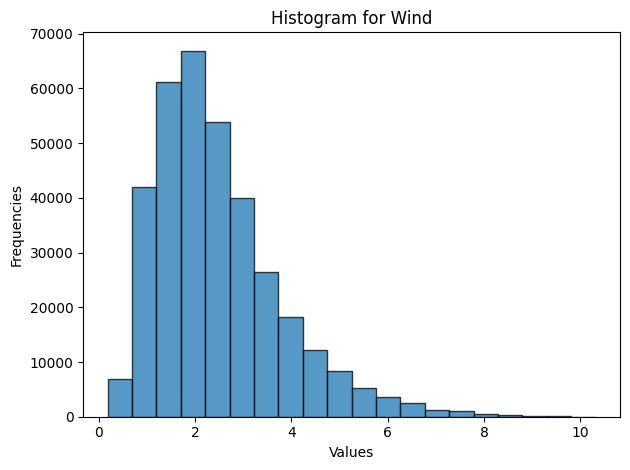

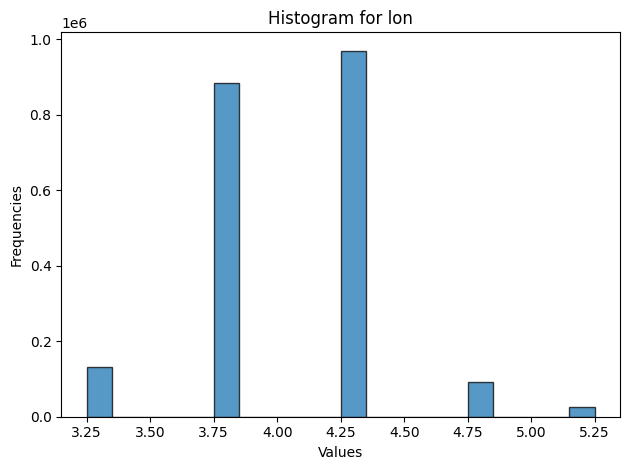

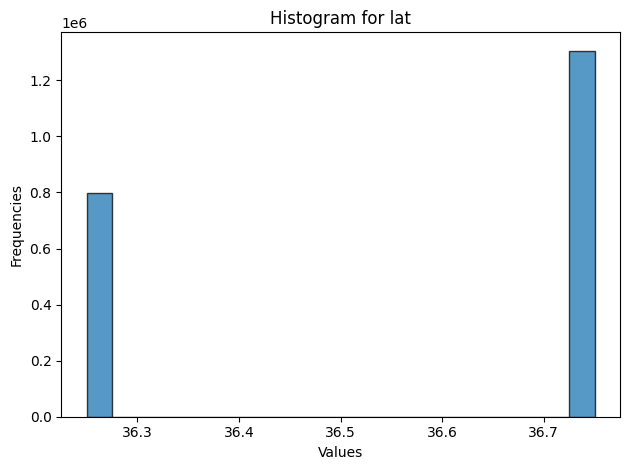

In [21]:
attributes = ['PSurf', 'Qair', 'Rainf', 'Snowf', 'Tair', 'Wind', 'lon', 'lat']

for attribute in attributes:
    bar_chart(df,attribute, bins=20)

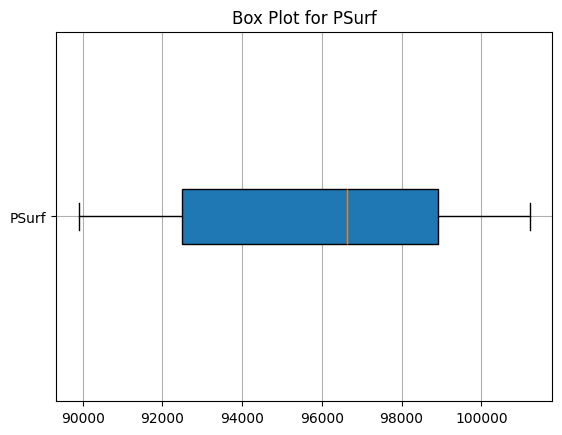

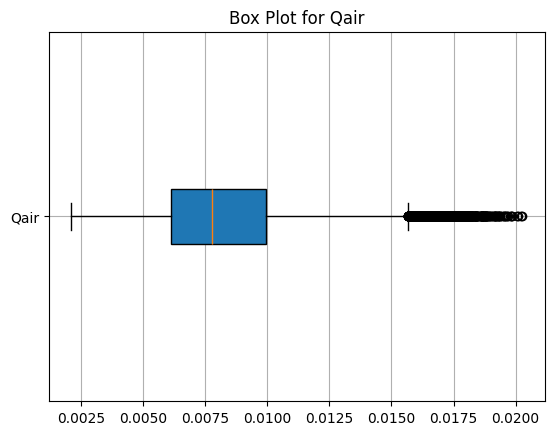

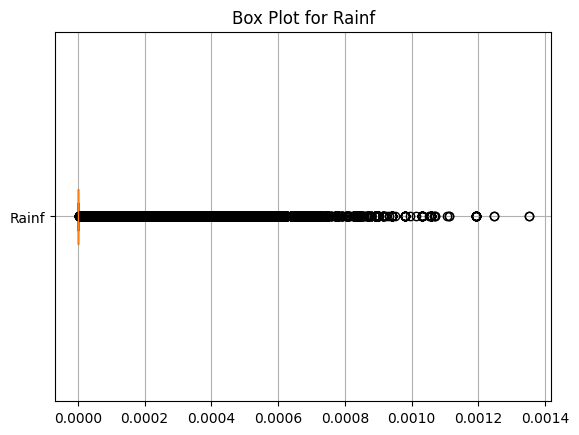

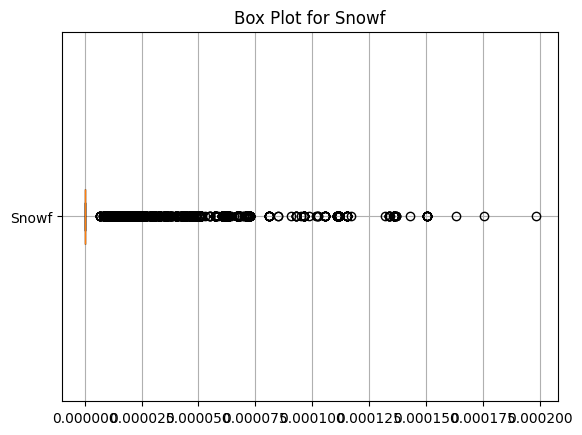

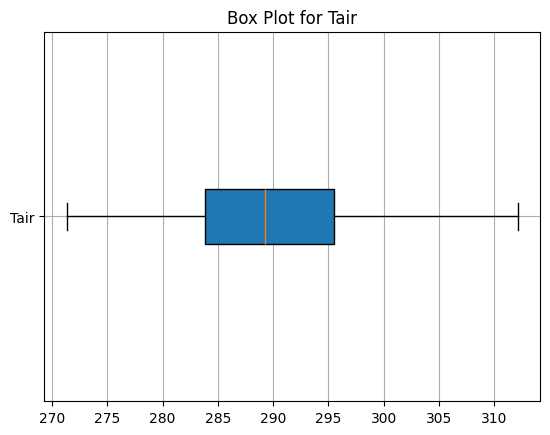

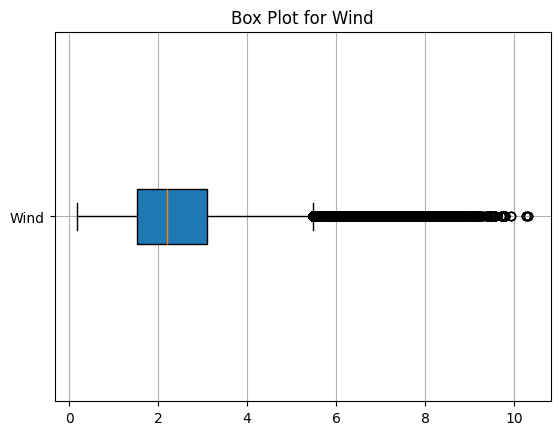

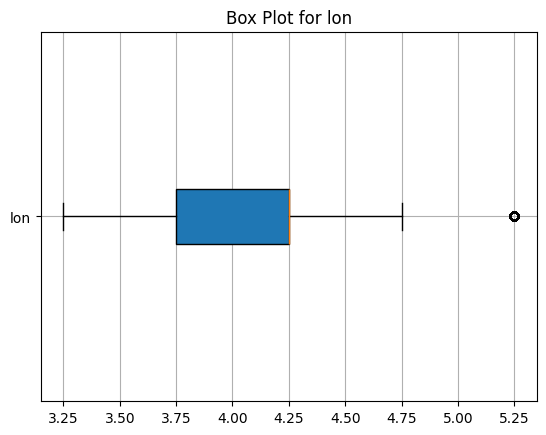

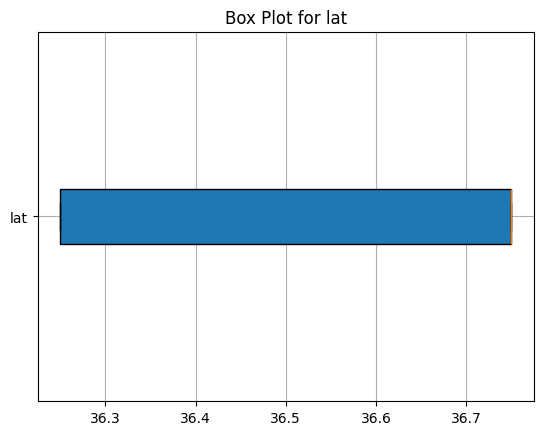

In [22]:
attributes = ['PSurf', 'Qair', 'Rainf', 'Snowf', 'Tair', 'Wind', 'lon', 'lat']

for attribute in attributes:
    generate_box_plot(df[attribute], attribute, show_outliers=True)

In [24]:
def data_reduction(df):
   
    df['time'] = pd.to_datetime(df['time'])
    
    df['month'] = df['time'].dt.month

    df_climate_winter = df[df['month'].isin([12, 1, 2])]
    df_climate_spring = df[df['month'].isin([3, 4, 5])]
    df_climate_summer = df[df['month'].isin([6, 7, 8])]
    df_climate_autumn = df[df['month'].isin([9, 10, 11])]

    return df_climate_winter, df_climate_spring, df_climate_summer, df_climate_autumn

In [25]:
df_climate_winter, df_climate_spring, df_climate_summer, df_climate_autumn = data_reduction(df)
print(df_climate_winter.info())
print(df_climate_spring.info())
print(df_climate_summer.info())
print(df_climate_autumn.info())

<class 'pandas.core.frame.DataFrame'>
Index: 518400 entries, 0 to 2102399
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   time      518400 non-null  datetime64[ns]
 1   PSurf     86400 non-null   float64       
 2   Qair      86400 non-null   float64       
 3   Rainf     86400 non-null   float64       
 4   Snowf     86400 non-null   float64       
 5   Tair      86400 non-null   float64       
 6   Wind      86400 non-null   float64       
 7   lon       518400 non-null  float64       
 8   lat       518400 non-null  float64       
 9   geometry  518400 non-null  object        
 10  month     518400 non-null  int32         
dtypes: datetime64[ns](1), float64(8), int32(1), object(1)
memory usage: 45.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 529920 entries, 56640 to 1896959
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----

In [26]:
import geopandas as gpd


soil_gdf = gpd.read_file("tizi_ouzou_soil_data.gpkg")  
climate_gdf = gpd.read_file("final_climate_data.gpkg")


In [27]:
print(soil_gdf.info())
print(climate_gdf.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   CNT_FULLNAME      4 non-null      object  
 1   sand % topsoil    4 non-null      float64 
 2   sand % subsoil    4 non-null      float64 
 3   silt % topsoil    4 non-null      float64 
 4   silt% subsoil     4 non-null      float64 
 5   clay % topsoil    4 non-null      float64 
 6   clay % subsoil    4 non-null      float64 
 7   pH water topsoil  4 non-null      float64 
 8   pH water subsoil  4 non-null      float64 
 9   OC % topsoil      4 non-null      float64 
 10  OC % subsoil      4 non-null      float64 
 11  N % topsoil       4 non-null      float64 
 12  N % subsoil       4 non-null      float64 
 13  BS % topsoil      4 non-null      float64 
 14  BS % subsoil      4 non-null      float64 
 15  CEC topsoil       4 non-null      float64 
 16  CEC subsoil       4 no

In [30]:
def data_integration(soil_gdf,climate_gdf):

    merged_gdf = gpd.sjoin(climate_gdf, soil_gdf, how="inner", predicate="within")

    return merged_gdf

In [31]:
final_merged_data = data_integration(soil_gdf,climate_gdf)
print(final_merged_data.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1181904 entries, 744 to 2094215
Data columns (total 36 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   time              1181904 non-null  datetime64[ms]
 1   PSurf             196368 non-null   float32       
 2   Qair              196584 non-null   float32       
 3   Rainf             200712 non-null   float32       
 4   Snowf             204984 non-null   float32       
 5   Tair              185472 non-null   float32       
 6   Wind              197784 non-null   float32       
 7   lon               1181904 non-null  float64       
 8   lat               1181904 non-null  float64       
 9   geometry          1181904 non-null  geometry      
 10  index_right       1181904 non-null  int64         
 11  CNT_FULLNAME      1181904 non-null  object        
 12  sand % topsoil    1181904 non-null  float64       
 13  sand % subsoil    1181904 non-null  f

In [32]:
final_merged_data.head()

,time,PSurf,Qair,Rainf,Snowf,Tair,Wind,lon,lat,geometry,...,CEC topsoil,CEC subsoil,CEC clay topsoil,CEC Clay subsoil,CaCO3 % topsoil,CaCO3 % subsoil,BD topsoil,BD subsoil,C/N topsoil,C/N subsoil
744,2019-01-01 00:00:00,97762.703125,NaN,NaN,NaN,NaN,NaN,4.75,36.75,POINT (4.75 36.75),...,12.06,12.14,47.6,42.8,2.02,5.1,1.42,1.5,10.8,8.4
745,2019-01-01 01:00:00,97776.882812,NaN,NaN,NaN,NaN,NaN,4.75,36.75,POINT (4.75 36.75),...,12.06,12.14,47.6,42.8,2.02,5.1,1.42,1.5,10.8,8.4
746,2019-01-01 02:00:00,97789.710938,NaN,NaN,NaN,NaN,NaN,4.75,36.75,POINT (4.75 36.75),...,12.06,12.14,47.6,42.8,2.02,5.1,1.42,1.5,10.8,8.4
747,2019-01-01 03:00:00,97768.765625,NaN,NaN,NaN,NaN,NaN,4.75,36.75,POINT (4.75 36.75),...,12.06,12.14,47.6,42.8,2.02,5.1,1.42,1.5,10.8,8.4
748,2019-01-01 04:00:00,97754.539062,NaN,NaN,NaN,NaN,NaN,4.75,36.75,POINT (4.75 36.75),...,12.06,12.14,47.6,42.8,2.02,5.1,1.42,1.5,10.8,8.4


In [38]:
import math
import pandas as pd

def handling_outliers(df, attributes, choice):
    # Calculating the number of bins
    bins_number = int(math.sqrt(len(df)))
    binned_df = df.copy()

    match choice:
        case 'Equal Frequency Binning':
            equal_frequency_bins_df = {}

            # Defining the bins
            for attribute in attributes:
                equal_frequency_bins = []
                sorted_values = sorted(df[attribute].dropna())  
                bin_size = len(sorted_values) // bins_number  

                if bin_size == 0:
                    print(f"Warning: No valid values to create bins for {attribute}.")
                    continue

                for i in range(bins_number):
                    bin_min = sorted_values[i * bin_size]  
                    if i == bins_number - 1:  
                        bin_max = sorted_values[-1]  
                    else:
                        bin_max = sorted_values[(i + 1) * bin_size - 1]
                    equal_frequency_bins.append((bin_min, bin_max))
                
                equal_frequency_bins_df[attribute] = equal_frequency_bins
            
            # Assigning the corresponding bin to each value 
            for attribute in attributes:
                bin_values = []
                for value in df[attribute]:
                    if pd.isna(value):  
                        bin_values.append(None)
                        continue
                    assigned = False  # Flag to check if a value is assigned to a bin
                    for bin in equal_frequency_bins_df[attribute]:
                        bin_min, bin_max = bin
                        if bin_min <= value < bin_max:  
                            bin_values.append(bin)
                            assigned = True
                            break
                    if not assigned:
                        bin_values.append(None)  

                # Check lengths before assignment
                if len(bin_values) != len(df):
                    print(f"Warning: Length mismatch for {attribute + '_equal_frequency_binned'}")
                
                binned_df[attribute + "_equal_frequency_binned"] = bin_values

        case 'Binning by Mean':
            equal_frequency_bins_df = {}

            # Defining the bins
            for attribute in attributes:
                equal_frequency_bins = []
                sorted_values = sorted(df[attribute].dropna())
                bin_size = len(sorted_values) // bins_number

                for i in range(bins_number):
                    bin_min = sorted_values[i * bin_size]
                    if i == bins_number - 1:
                        bin_max = sorted_values[-1]
                    else:
                        bin_max = sorted_values[(i + 1) * bin_size - 1]
                    equal_frequency_bins.append((bin_min, bin_max))
                
                equal_frequency_bins_df[attribute] = equal_frequency_bins
            
            # Calculating the means for each bin
            for attribute in attributes:
                bin_means = {bin: 0 for bin in equal_frequency_bins_df[attribute]}
                bin_counts = {bin: 0 for bin in equal_frequency_bins_df[attribute]}
                binned_values = []

                for value in df[attribute]:
                    if pd.isna(value):
                        binned_values.append(None)
                        continue
                    for bin in equal_frequency_bins_df[attribute]:
                        bin_min, bin_max = bin
                        if bin_min <= value < bin_max:
                            bin_means[bin] += value
                            bin_counts[bin] += 1
                            break
                
                # Calculating means
                for bin in bin_means:
                    if bin_counts[bin] > 0: 
                        bin_means[bin] /= bin_counts[bin]

                # Assigning the mean of the bin to each value
                for value in df[attribute]:
                    if pd.isna(value):
                        binned_values.append(None)
                        continue
                    for bin in equal_frequency_bins_df[attribute]:
                        bin_min, bin_max = bin
                        if bin_min <= value < bin_max:
                            binned_values.append(bin_means[bin])
                            break
                binned_df[attribute + "_mean_binned"] = binned_values
            
        case 'Binning by Median':
            equal_frequency_bins_df = {}

            # Defining the bins
            for attribute in attributes:
                equal_frequency_bins = []
                sorted_values = sorted(df[attribute].dropna())
                bin_size = len(sorted_values) // bins_number

                for i in range(bins_number):
                    bin_min = sorted_values[i * bin_size]
                    if i == bins_number - 1:
                        bin_max = sorted_values[-1]
                    else:
                        bin_max = sorted_values[(i + 1) * bin_size - 1]
                    equal_frequency_bins.append((bin_min, bin_max))
                
                equal_frequency_bins_df[attribute] = equal_frequency_bins
            
            # Calculating thr medians for each bin
            for attribute in attributes:
                bin_values = {bin: [] for bin in equal_frequency_bins_df[attribute]}
                binned_values = []

                for value in df[attribute]:
                    if pd.isna(value):
                        binned_values.append(None)
                        continue
                    for bin in equal_frequency_bins_df[attribute]:
                        bin_min, bin_max = bin
                        if bin_min <= value < bin_max:
                            bin_values[bin].append(value)
                            break
                
                # Calculating medians
                bin_medians = {}
                for bin in bin_values:
                    if bin_values[bin]:  
                        bin_medians[bin] = pd.Series(bin_values[bin]).median()  
                    else:
                        bin_medians[bin] = None  

                # Assigning the median of the bin to each value
                for value in df[attribute]:
                    if pd.isna(value):
                        binned_values.append(None)
                        continue
                    for bin in equal_frequency_bins_df[attribute]:
                        bin_min, bin_max = bin
                        if bin_min <= value < bin_max:
                            binned_values.append(bin_medians[bin])
                            break
                binned_df[attribute + "_median_binned"] = binned_values
            
        case 'Interval Binning':
            # Here we define fixed intervals 
            interval_bins_df = {}
            interval_size = 10000  # Size of the intervals
            for attribute in attributes:
                interval_bins = []
                min_value = df[attribute].min()
                max_value = df[attribute].max()
                
                # bins based on the specified interval size
                for start in range(int(min_value), int(max_value) + interval_size, interval_size):
                    end = start + interval_size
                    interval_bins.append((start, end))
                
                interval_bins_df[attribute] = interval_bins
            
            # Assigning the corresponding bin to each value 
            for attribute in attributes:
                bin_values = []
                for value in df[attribute]:
                    if pd.isna(value):
                        bin_values.append(None)
                        continue
                    for bin in interval_bins_df[attribute]:
                        bin_min, bin_max = bin
                        if bin_min <= value < bin_max:
                            bin_values.append(bin)
                            break
                binned_df[attribute + "_interval_binned"] = bin_values
            
    return binned_df


In [39]:
attributes = ['PSurf', 'Qair', 'Rainf', 'Snowf', 'Tair', 'Wind', 'lon', 'lat',
    'sand % topsoil', 'sand % subsoil', 'silt % topsoil', 'silt% subsoil',
    'clay % topsoil', 'clay % subsoil', 'pH water topsoil',
    'pH water subsoil', 'OC % topsoil', 'OC % subsoil', 'N % topsoil',
    'N % subsoil', 'BS % topsoil', 'BS % subsoil', 'CEC topsoil',
    'CEC subsoil', 'CEC clay topsoil', 'CEC Clay subsoil',
    'CaCO3 % topsoil', 'CaCO3 % subsoil', 'BD topsoil', 'BD subsoil',
    'C/N topsoil', 'C/N subsoil']

equaly_frequent_binned_df = handling_outliers(final_merged_data,attributes,'Equal Frequency Binning')
mean_binned_df = handling_outliers(final_merged_data,attributes,'Binning by Mean')
median_binned_df = handling_outliers(final_merged_data,attributes,'Binning by Median')
interval_binned_df = handling_outliers(final_merged_data,attributes,'Interval Binning')

KeyboardInterrupt: 

In [ ]:
print(equaly_frequent_binned_df.head())
print(mean_binned_df.head())
print(median_binned_df.head())
print(interval_binned_df.head())

In [ ]:
equaly_frequent_binned_df.to_file("equaly_frequent_binned_df.gpkg", driver="GPKG")
mean_binned_df.to_file("mean_binned_df.gpkg", driver="GPKG")
median_binned_df.to_file("median_binned_df.gpkg", driver="GPKG")
interval_binned_df.to_file("interval_binned_df.gpkg", driver="GPKG")